In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\shahe\Desktop\Innomatics Task\data.xlsx")

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


In [7]:
numerical_df = df.select_dtypes(["int64", "float64"])

In [8]:
numerical_df.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.3,2007,95.8,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.4,2007,85.0,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.0,2010,68.2,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.6,2007,83.6,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.0,2008,76.8,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
numerical_df.shape

(3998, 27)

In [10]:
cat_df = df.select_dtypes("object")

In [11]:
cat_df.head()

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,train,present,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,train,present,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,train,present,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,train,present,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,train,2015-03-01 00:00:00,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh


In [12]:
cat_df.shape

(3998, 10)

In [13]:
numerical_df.isna().sum()

ID                       0
Salary                   0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeTier              0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [14]:
cat_df.isna().sum()

Unnamed: 0        0
DOL               0
Designation       0
JobCity           0
Gender            0
10board           0
12board           0
Degree            0
Specialization    0
CollegeState      0
dtype: int64

In [15]:
cat_df.drop("Unnamed: 0", axis=1, inplace = True)

In [16]:
df.drop("Unnamed: 0", axis=1, inplace = True)

### Univariate Analysis

In [17]:
numerical_df.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

<Axes: >

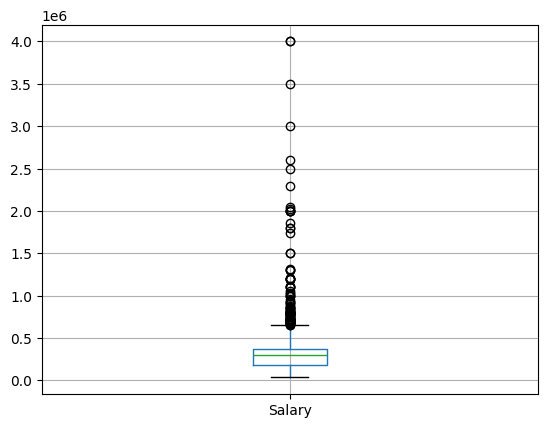

In [18]:
numerical_df.boxplot(column="Salary")

In [21]:
print("Mean:", numerical_df.Salary.mean())
print("Median:", numerical_df.Salary.median())
print("Mode:", numerical_df.Salary.mode()[0])
print("Std:", numerical_df.Salary.std())
print("Min:", numerical_df.Salary.min())
print("Max:", numerical_df.Salary.max())

Mean: 307699.8499249625
Median: 300000.0
Mode: 300000
Std: 212737.4999568574
Min: 35000
Max: 4000000


Average Salary is 307700. Minimum- 35000 and Maximum salary is 4000000¶

In [22]:
numerical_df["Salary"].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

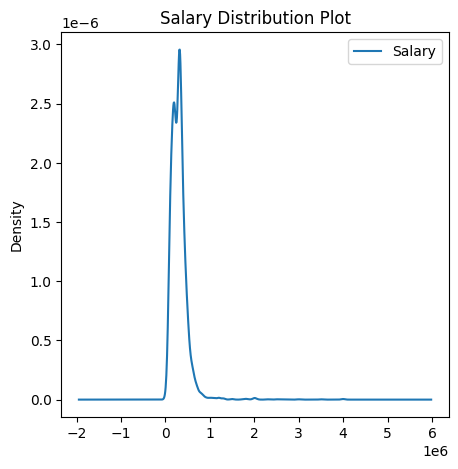

In [23]:
fig,ax=plt.subplots()
numerical_df.Salary.plot(kind='kde', title='Salary Distribution Plot', figsize=(5,5), legend=True, ax=ax)
plt.show()

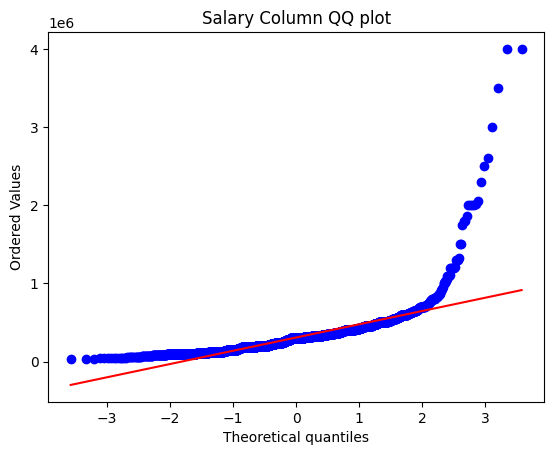

In [24]:
fig, ax = plt.subplots()
stats.probplot(numerical_df["Salary"], plot=ax)

ax.set_title("Salary Column QQ plot")
plt.show()

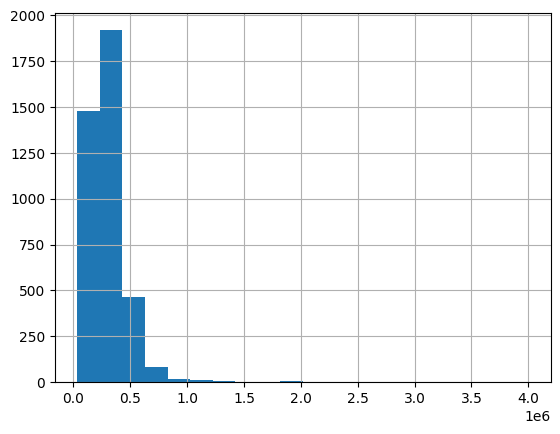

In [27]:
numerical_df.Salary.hist(bins=20)
plt.show()

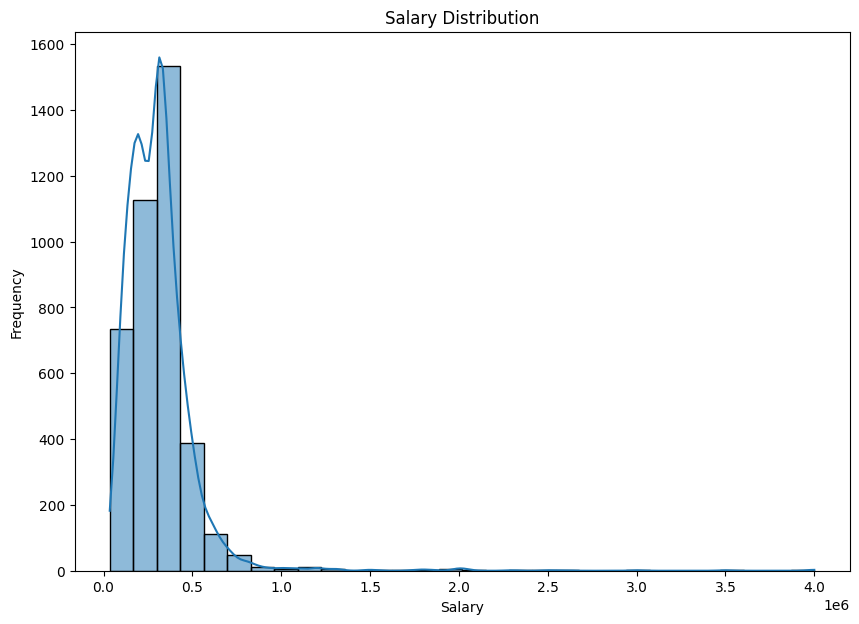

In [29]:
plt.figure(figsize=(10, 7))
sns.histplot(numerical_df['Salary'], bins = 30, kde=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

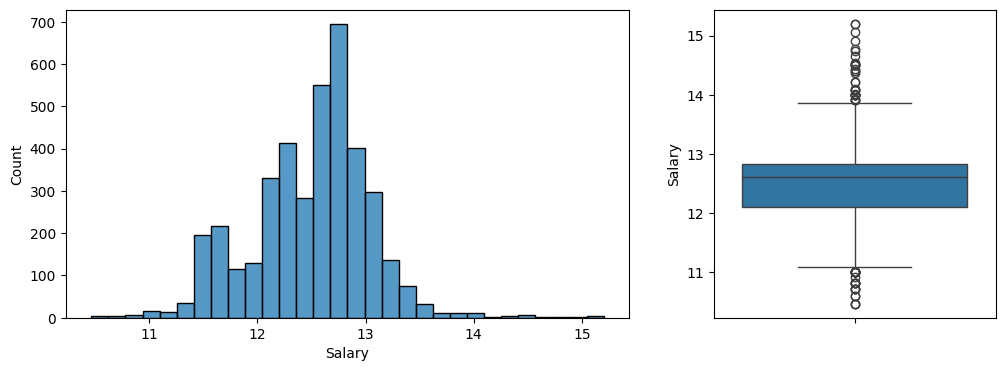

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(np.log(numerical_df['Salary']), ax=ax1, bins=30)
sns.boxplot(np.log(numerical_df['Salary']), ax=ax2)
plt.show()

,10percentage,12percentage,collegeGPA
count,3998.00,3998.00,3998.00
mean,77.93,74.47,71.49
std,9.85,11.00,8.17
min,43.00,40.00,6.45
25%,71.68,66.00,66.41
50%,79.15,74.40,71.72
75%,85.67,82.60,76.33
max,97.76,98.70,99.93


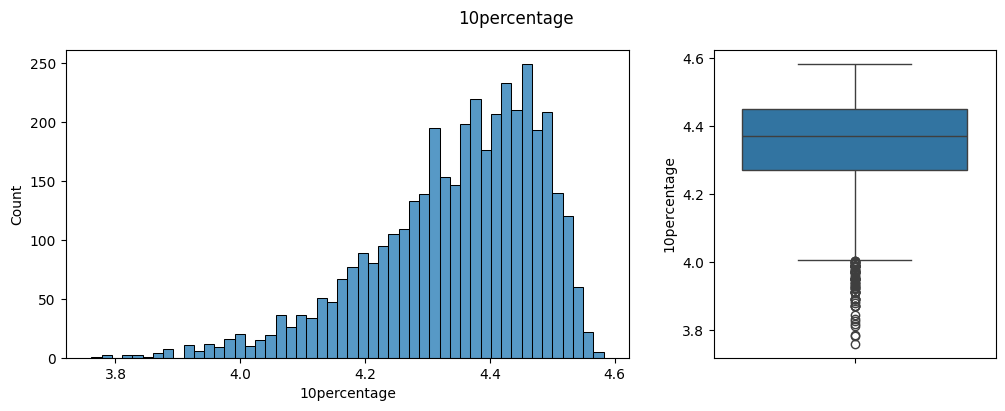

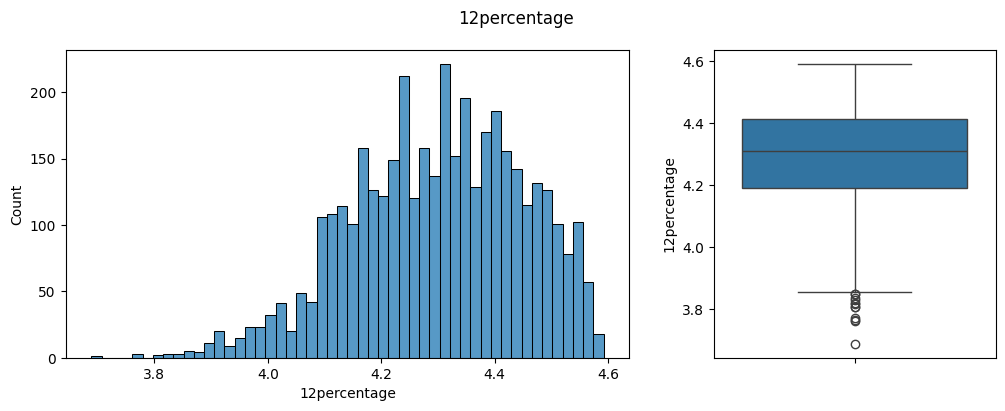

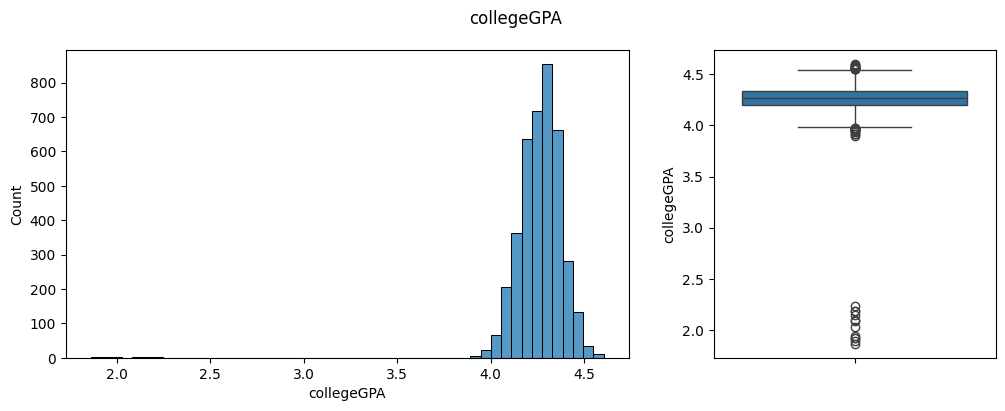

In [37]:
display(numerical_df[['10percentage', '12percentage', 'collegeGPA']].describe().round(2))
for col in ['10percentage', '12percentage', 'collegeGPA']:
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
    sns.histplot(np.log(numerical_df[col]), ax=ax1, bins=50)
    sns.boxplot(np.log(numerical_df[col]), ax=ax2)
    plt.suptitle(col)
    plt.show()

The column collegeGPA contains outliers. Values less than 20 are markedly different from the other points. It consists of extreme outliers

C:\Users\shahe\AppData\Local\Temp\ipykernel_15864\3775562005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df['collegeGPA'].round(0), ax=axs[0])
C:\Users\shahe\AppData\Local\Temp\ipykernel_15864\3775562005.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df['10percen

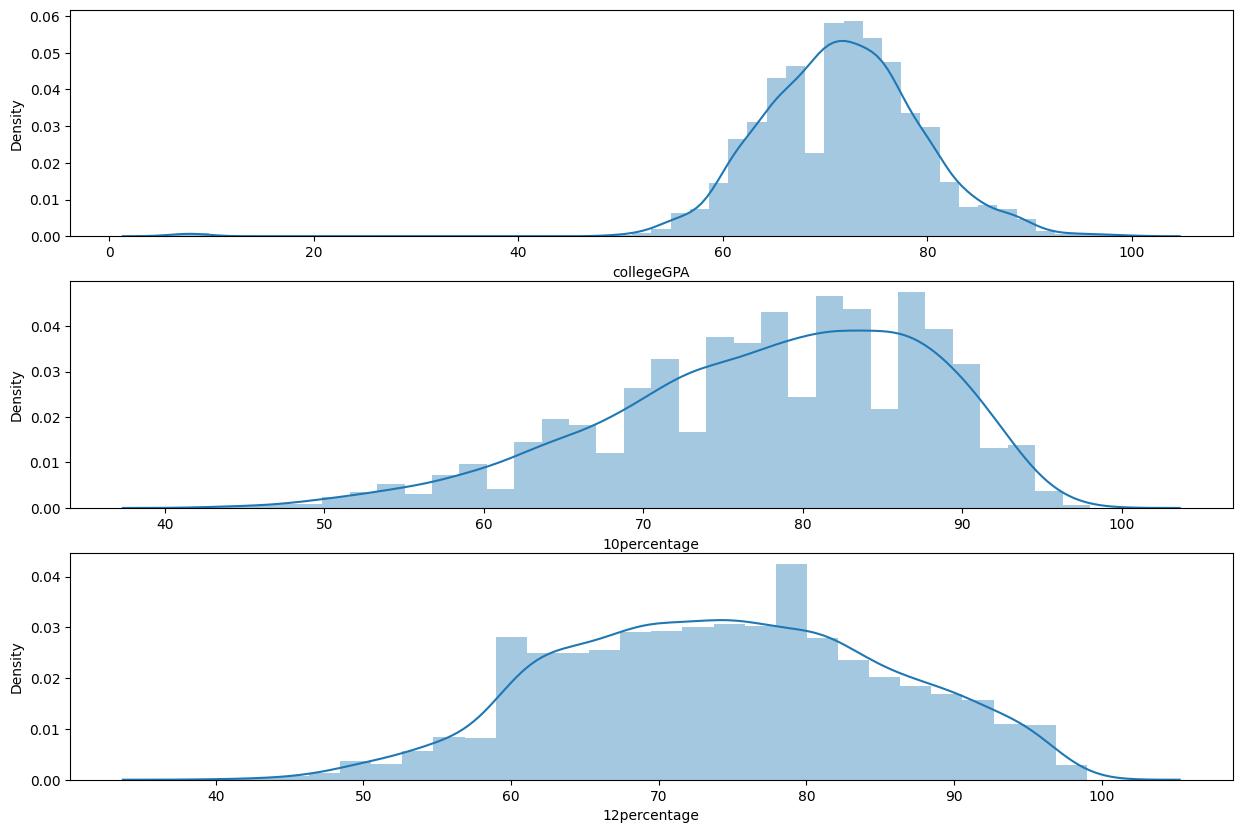

In [38]:
fig, axs = plt.subplots(3, figsize=(15, 10))

sns.distplot(numerical_df['collegeGPA'].round(0), ax=axs[0])
sns.distplot(numerical_df['10percentage'].round(0), ax=axs[1])
sns.distplot(numerical_df['12percentage'].round(0), ax=axs[2]);
plt.show()

Most of the collegeGPA is concentrated in between 60 to 80
In 10 percentage we can see a continuous rise in until 90 , there is a sudden increase at 60 percent in 12 class
Most the students tend to get around 70 to 80 percent of marks during their school and college life.


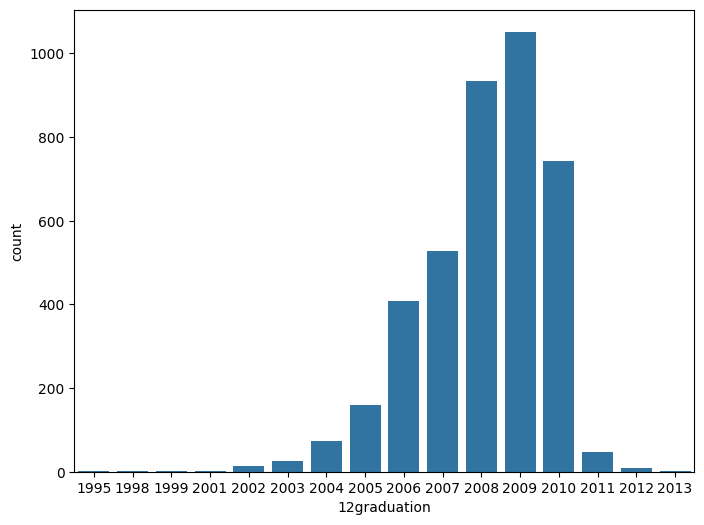

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='12graduation', data=numerical_df)
plt.show()

In 2009 students who completed 12th graduation are more as compared to other years.

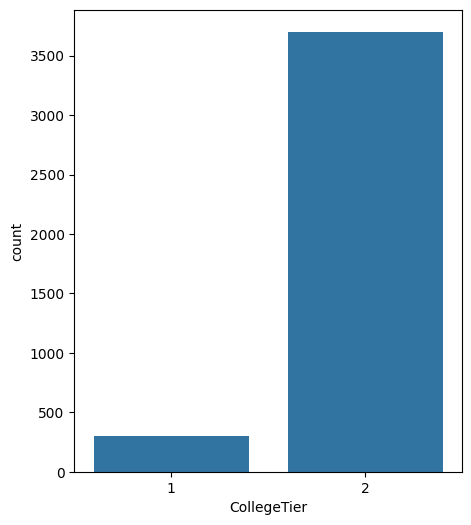

In [40]:
plt.figure(figsize=(5, 6))
sns.countplot(x='CollegeTier', data=numerical_df)
plt.show()

Maximum students are of tier 2 college

In [41]:
df['DOB']= pd.to_datetime(df['DOB'])

In [42]:
df['Age']= 2015 - df['DOB'].dt.year

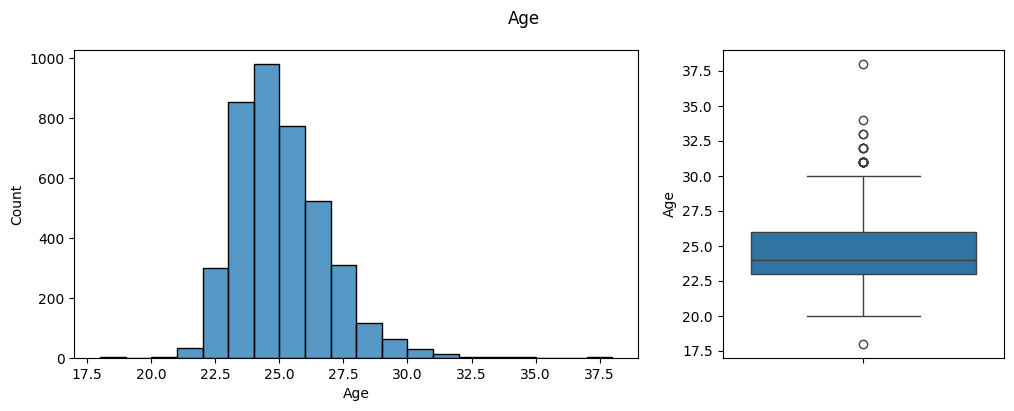

In [44]:
 fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
 sns.histplot(df['Age'], ax=ax1, bins=20)
 sns.boxplot(df['Age'], ax=ax2)
 plt.suptitle('Age')
 plt.show()

In [45]:
df['Age'].describe()

count    3998.000000
mean       24.572536
std         1.767473
min        18.000000
25%        23.000000
50%        24.000000
75%        26.000000
max        38.000000
Name: Age, dtype: float64

Mean age of the people are 24years
From the above points i.e. 75 percent of the people are of 26 years old means they are young and ,ostly must be in college or company.
Max age of person is 38years.

### AMCAT Scores

In [48]:
scores =['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
standard_scores = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

In [49]:
df[scores].describe()

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842
std,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505
min,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000


In [50]:
df[scores] = df[scores].replace(-1, np.nan)

In [52]:
df[standard_scores].describe()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,1.028666,0.941782,0.951471,1.007580,1.008075
min,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.995300,1.904800,2.535400,3.352500,1.822400


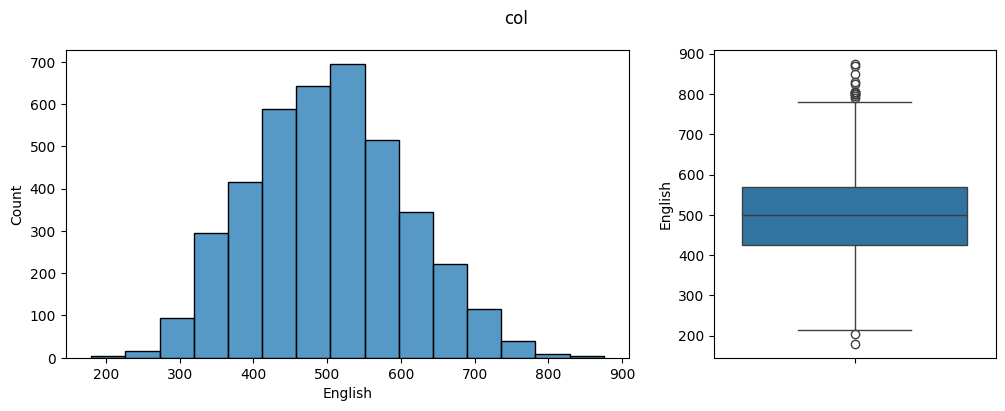

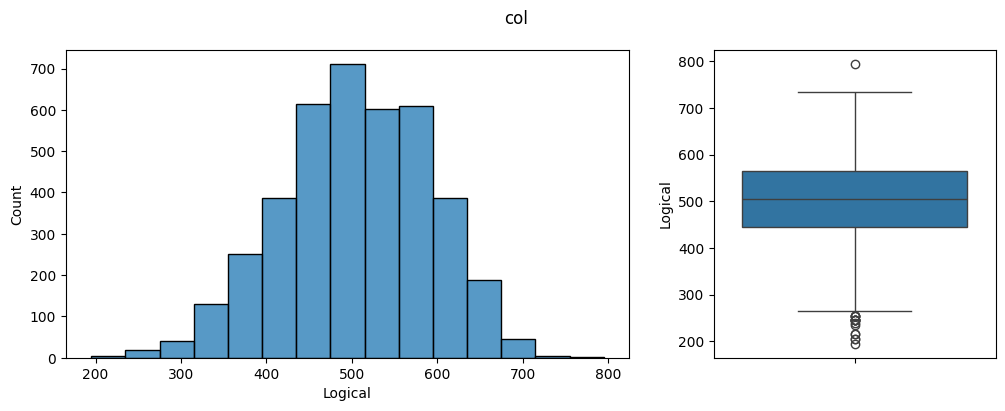

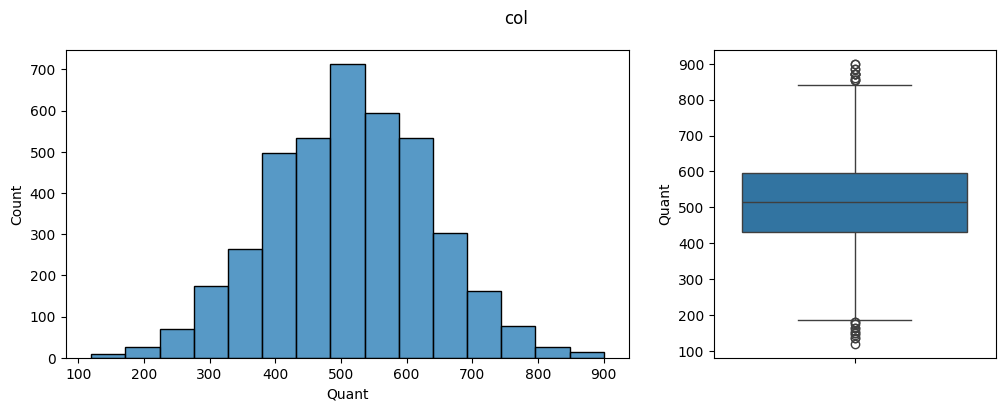

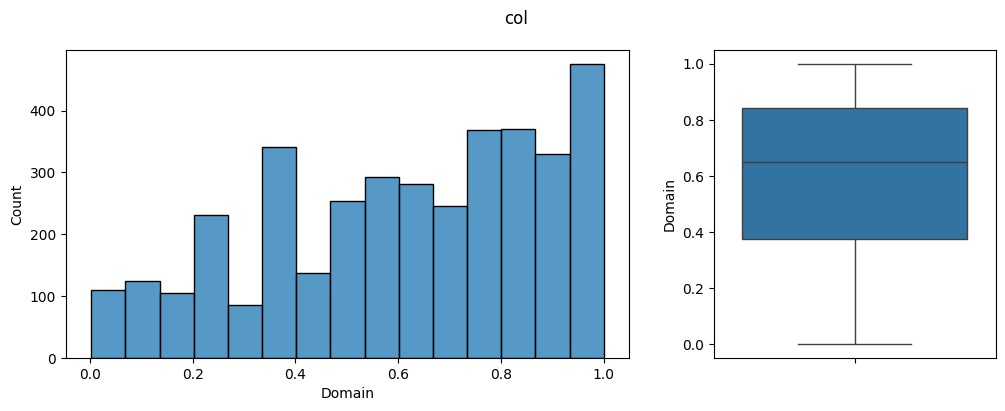

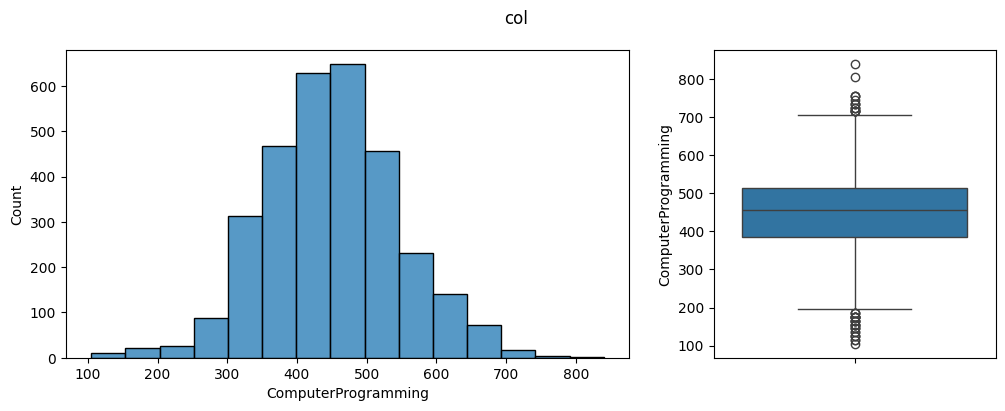

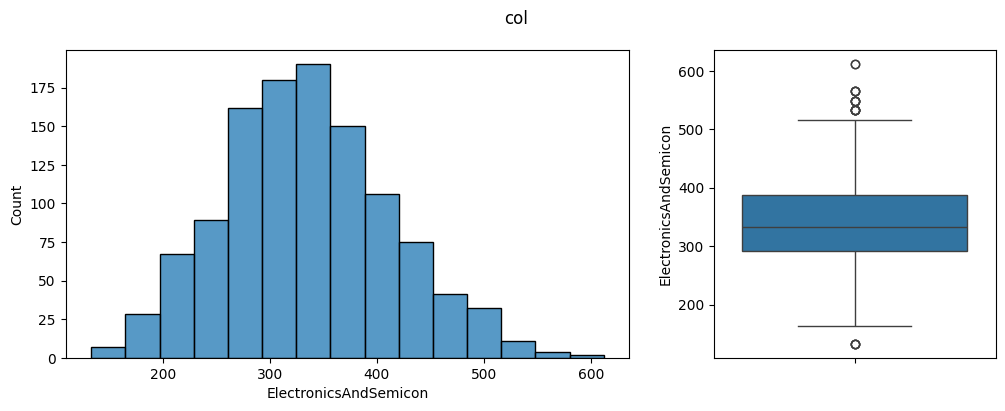

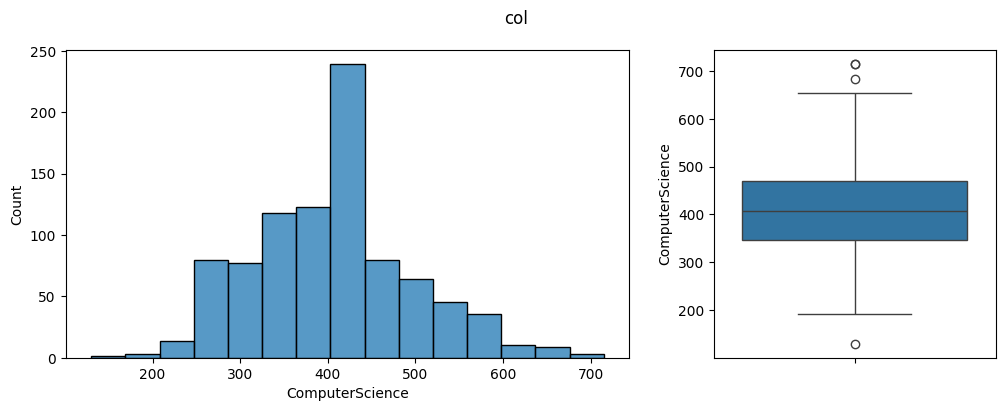

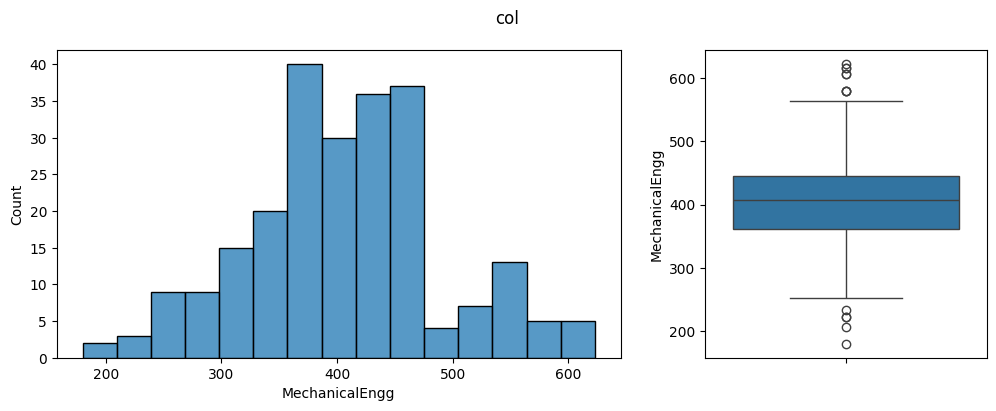

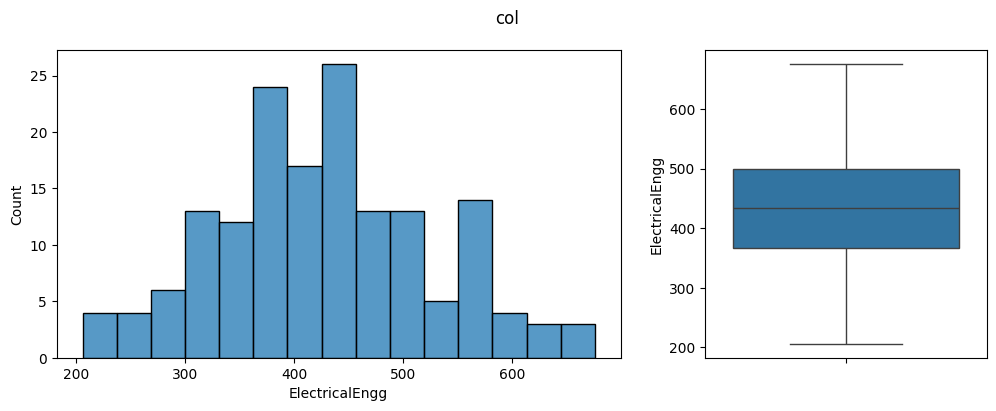

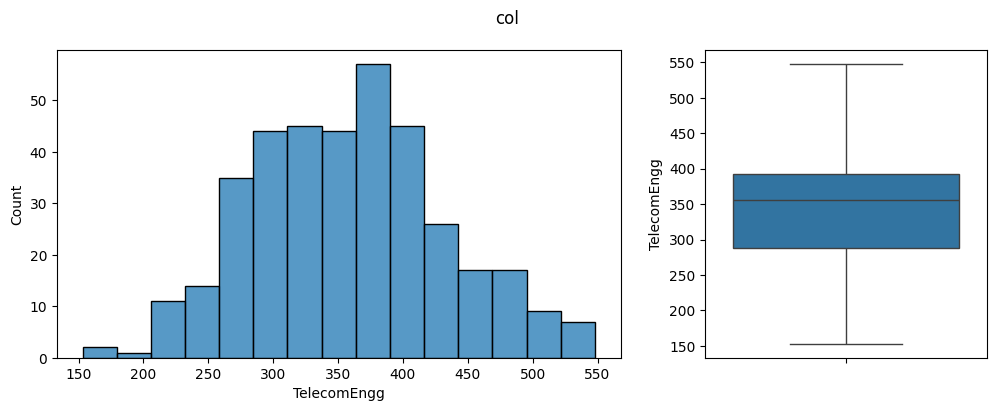

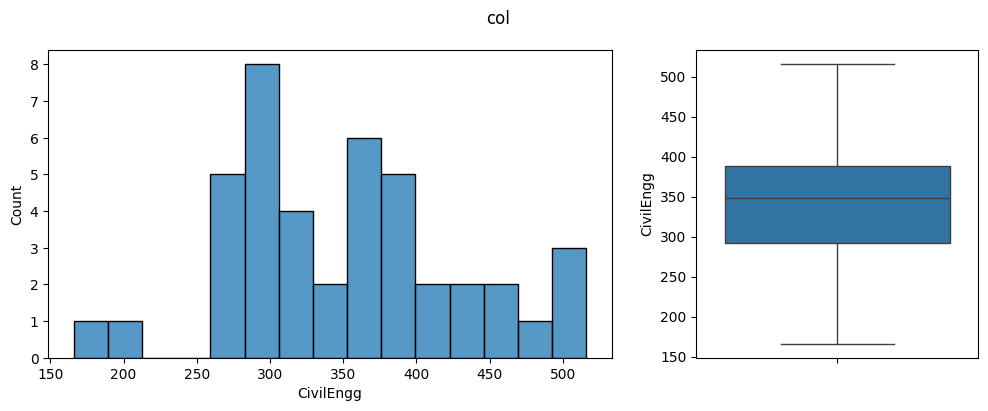

In [53]:
for col in scores:
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
    sns.histplot(df[col], ax=ax1, bins=15)
    sns.boxplot(df[col], ax=ax2)
    plt.suptitle('col')
    plt.show()

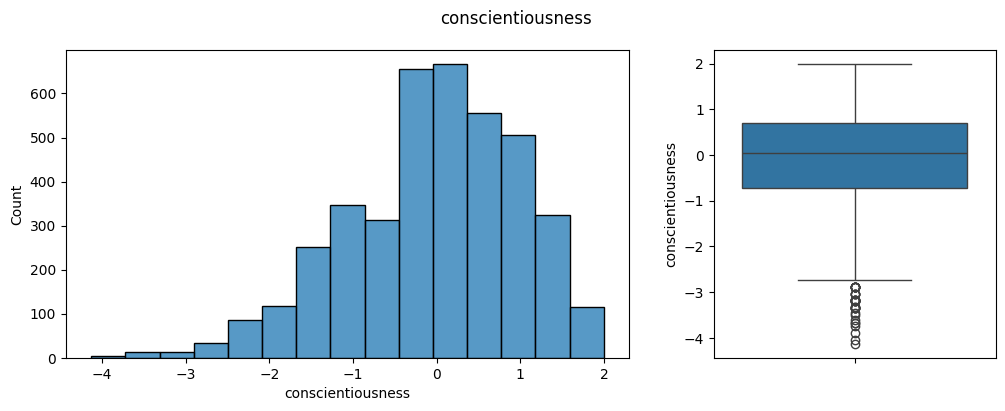

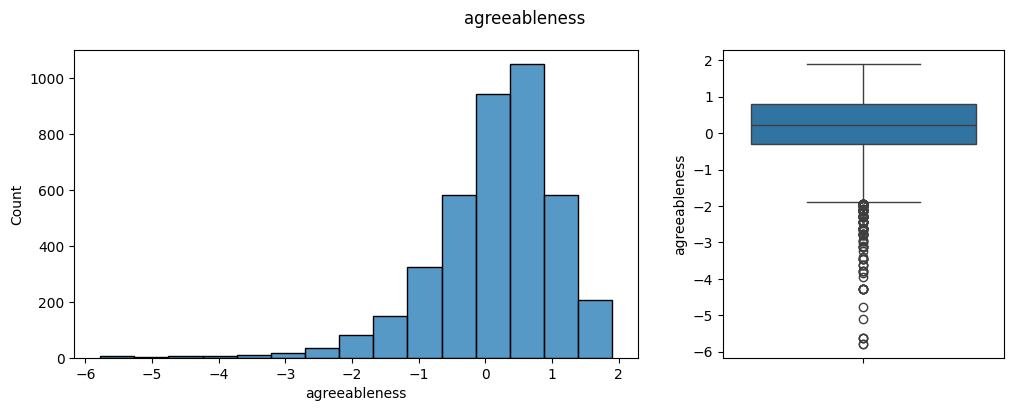

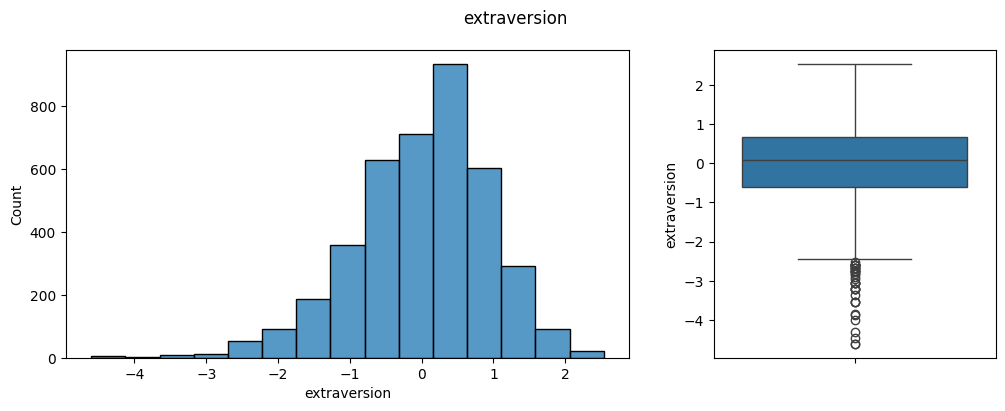

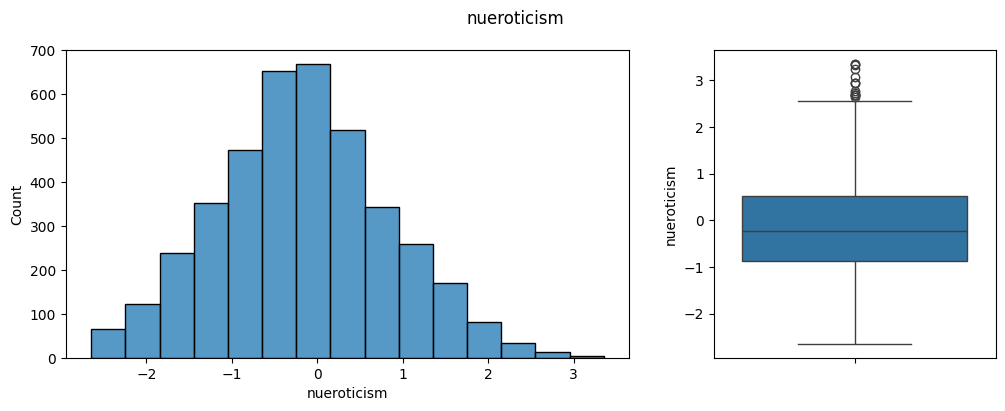

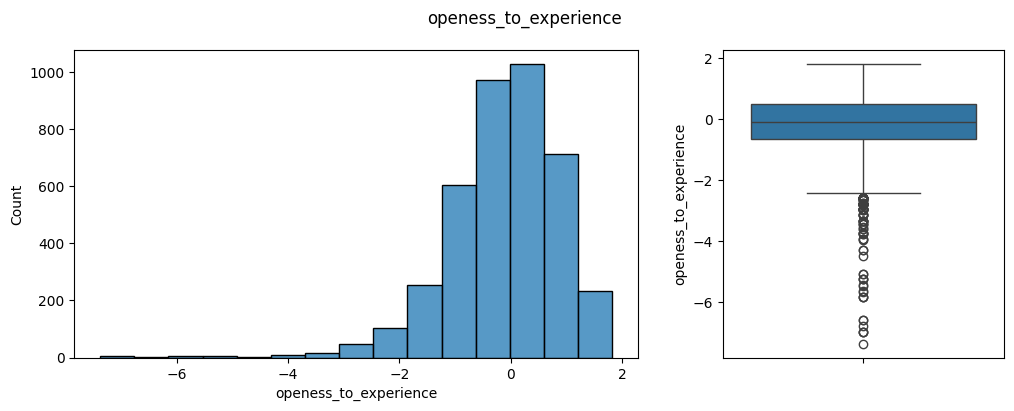

In [54]:
for col in standard_scores:
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
    sns.histplot(df[col], ax=ax1, bins=15)
    sns.boxplot(df[col], ax=ax2)
    plt.suptitle(col)
    plt.show()

Except for "Domain" scores, the distributions of unstandardized scores are more or less symmetric, with a few moderate outliers.

Some distributions of standardized scores are skewed, with a lot of values less than three standard deviations from the mean.

12th Graduation

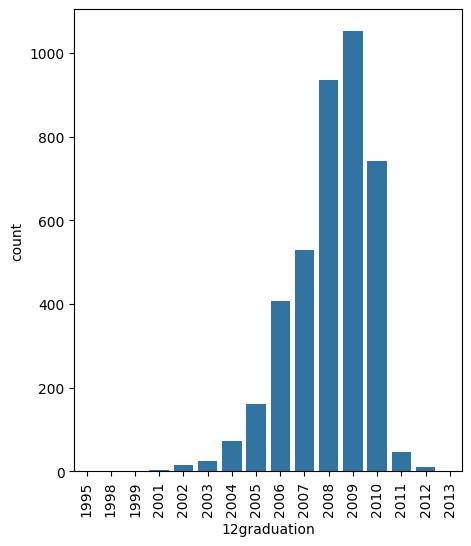

In [55]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x='12graduation')
plt.xticks(rotation=90)
plt.show()

Maximum students completed there 12th in 2009.

## Graduation Year

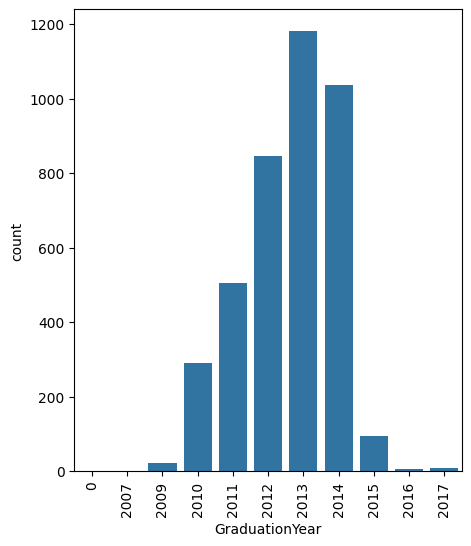

In [56]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df.dropna(subset='GraduationYear'), x='GraduationYear')
plt.xticks(rotation=90)
plt.show()

Maximum students are graduated completed bachelor's in 2013

### DOJ, DOL and JobDuration

In [57]:
df["DOL"]

0                   present
1                   present
2                   present
3                   present
4       2015-03-01 00:00:00
               ...         
3993    2012-10-01 00:00:00
3994    2013-07-01 00:00:00
3995                present
3996    2015-01-01 00:00:00
3997                present
Name: DOL, Length: 3998, dtype: object

In this the present status shows that the employee is currently working but according to the dataset it is of 2015 so with respect to that the analysis of the data is done on 2015 so instead of taking the present date as working we can take the year's end date to be the last when he left the company (hypothetical)

In [61]:
df['DOL'] = df['DOL'].replace('present', '2015-12-31 00:00:00')
df['DOL'] = pd.to_datetime(df['DOL'])

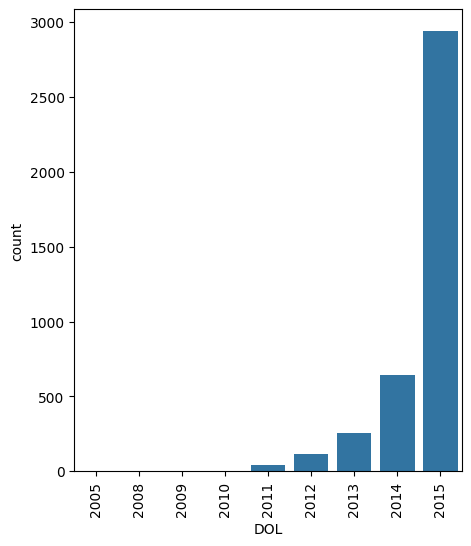

In [62]:
plt.figure(figsize=(5, 6))
sns.countplot(x=df['DOL'].dt.year)
plt.xticks(rotation=90)
plt.show()

In [63]:
df["DOJ"]=pd.to_datetime(df["DOJ"])

In [64]:
df["DOJ"]

0      2012-06-01
1      2013-09-01
2      2014-06-01
3      2011-07-01
4      2014-03-01
          ...    
3993   2011-10-01
3994   2013-07-01
3995   2013-07-01
3996   2014-07-01
3997   2013-02-01
Name: DOJ, Length: 3998, dtype: datetime64[ns]

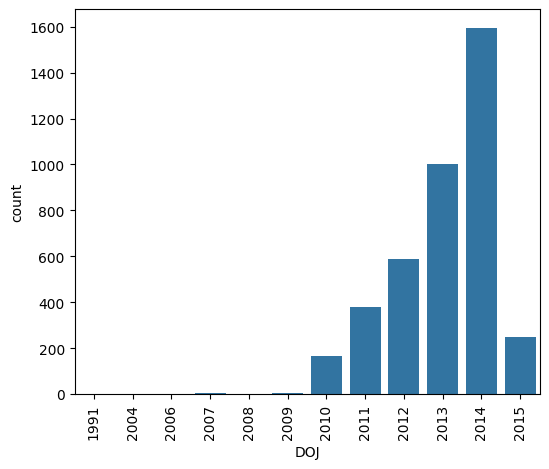

In [65]:
plt.figure(figsize=(6, 5))
sns.countplot(x=df['DOJ'].dt.year)
plt.xticks(rotation=90)
plt.show()

In [68]:
df[['DOJ', 'DOL']].describe()

,DOJ,DOL
count,3998,3998
mean,2013-07-02 11:04:10.325162496,2015-03-24 05:46:51.205602816
min,1991-06-01 00:00:00,2005-03-01 00:00:00
25%,2012-10-01 00:00:00,2014-11-01 00:00:00
50%,2013-11-01 00:00:00,2015-05-01 00:00:00
75%,2014-07-01 00:00:00,2015-12-31 00:00:00
max,2015-12-01 00:00:00,2015-12-31 00:00:00


Now we can calculate the at what age maximum person had started the job age and also the duration till he had done the job so extract the JobAge and JobDuration

In [69]:
df["JobAge"] = df["DOJ"].dt.year - df['DOB'].dt.year
df['JobAge'].describe().round(1)

count    3998.0
mean       22.6
std         1.4
min         0.0
25%        22.0
50%        22.0
75%        23.0
max        32.0
Name: JobAge, dtype: float64

In [70]:
df['JobAge'] = df['JobAge'].replace(0, np.nan)

In [72]:
df['JobDuration'] = (df['DOL'] - df['DOJ']).dt.total_seconds()/(60*60*24)
df['JobDuration'].describe().astype(int)

count    3998
mean      629
std       447
min      -303
25%       333
50%       548
75%       852
max      8979
Name: JobDuration, dtype: int32

In [73]:
df['JobDuration'] = df['JobDuration'].mask((df['JobDuration'] <=0)|(df['JobDuration'] > 8000), np.nan)
df['JobDuration'].describe().astype(int)

count    3942
mean      638
std       420
min        28
25%       334
50%       548
75%       881
max      3651
Name: JobDuration, dtype: int32

In [74]:
df['JobAge'].describe().round(1)

count    3997.0
mean       22.6
std         1.3
min        12.0
25%        22.0
50%        22.0
75%        23.0
max        32.0
Name: JobAge, dtype: float64

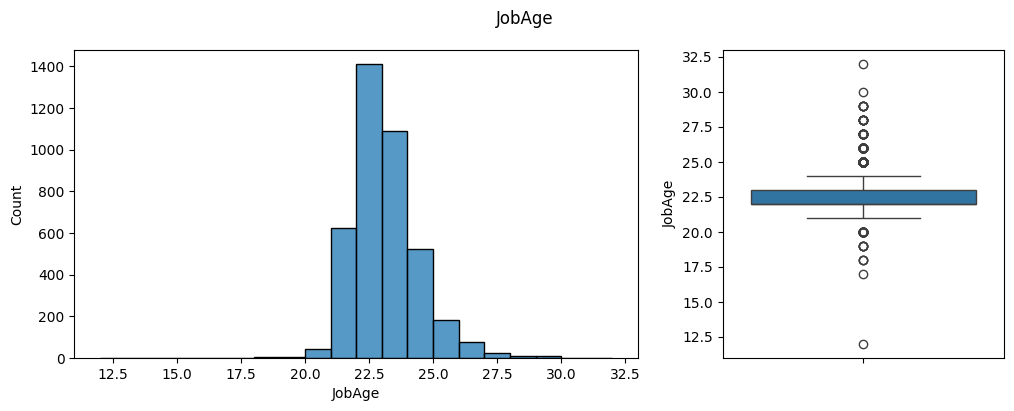

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(df['JobAge'], ax=ax1, bins=20)
sns.boxplot(df['JobAge'], ax=ax2)
plt.suptitle('JobAge')
plt.show()

In [76]:
df['JobDuration'].describe().astype(int)

count    3942
mean      638
std       420
min        28
25%       334
50%       548
75%       881
max      3651
Name: JobDuration, dtype: int32

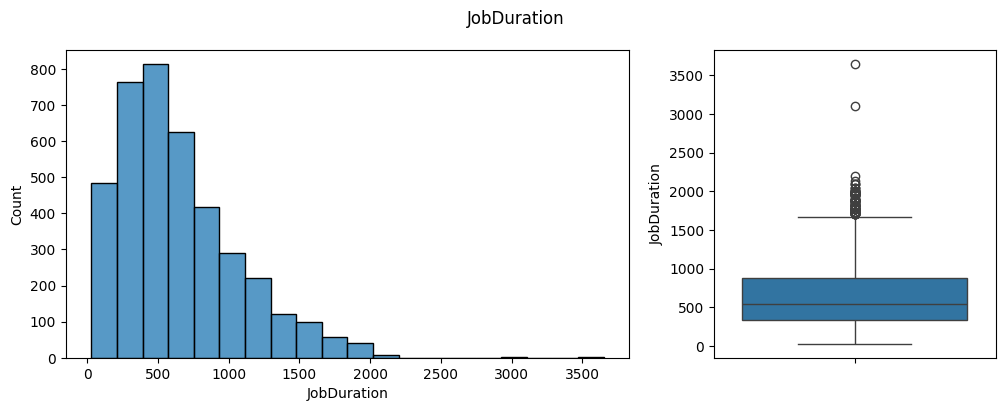

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(df['JobDuration'], ax=ax1, bins=20)
sns.boxplot(df['JobDuration'], ax=ax2)
plt.suptitle('JobDuration')
plt.show()

The majority of graduates started working between 2010 and 2014.

The average age at which graduates began working is 22.6 years.

The average time spent at the company is 638 days (1.74 years).

#### Categorical Feature

Gender

In [78]:
cat_df["Gender"].describe()

count     3998
unique       2
top          m
freq      3041
Name: Gender, dtype: object

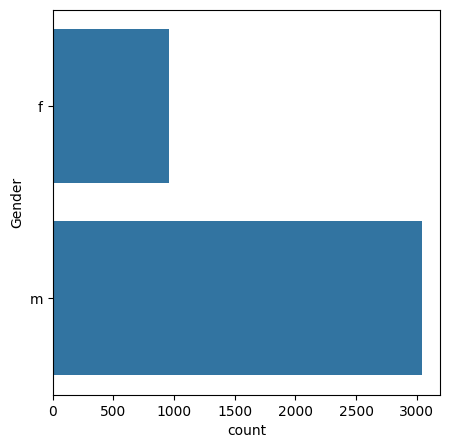

In [79]:
plt.figure(figsize=(5, 5))
sns.countplot(cat_df["Gender"])
plt.show()

Male category count is around 3000 and Female category count is around 1000.

In [80]:
cat_df.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

In [81]:
df.drop(["DOL", "DOJ"], axis=1, inplace=True)

In [82]:
cat_df.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

#### Designation

In [84]:
cat_df["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [85]:
cat_df["Designation"].nunique()

419

The column "Designation" contains 419 distinct job titles oﬀered to the graduates. Those titles can be subdivided into a smaller number of job roles.

In [87]:
def refine_feature(input_val, input_list):
    if type(input_val) == str:
        for item in [i for i in input_list if len(i.split()) > 1]:
            if all ([x in input_val for x in item.split()]):
                return item.title()
            for item in [i for i in input_list if len(i.split()) == 1]:
                if item in input_val:
                    if'engineer' in input_val:
                        return 'Hardware Engineer'
                        try:
                            matched_item = get_close_matches(input_vaal, input_list)[0]
                            return matched_item.title()
                        except:
                            return 'Other'
                    else:
                        return np.nan

In [88]:
role_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

In [89]:
df['Job_Role'] = df['Designation'].apply(lambda x: refine_feature(x, role_list))
df['Job_Role'] = df['Job_Role'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})
df['Job_Role'].value_counts(dropna=False)

Job_Role
NaN                  1482
Software Engineer     941
None                  811
System Engineer       456
Hardware Engineer     195
Test Engineer          79
Administrator          34
Name: count, dtype: int64

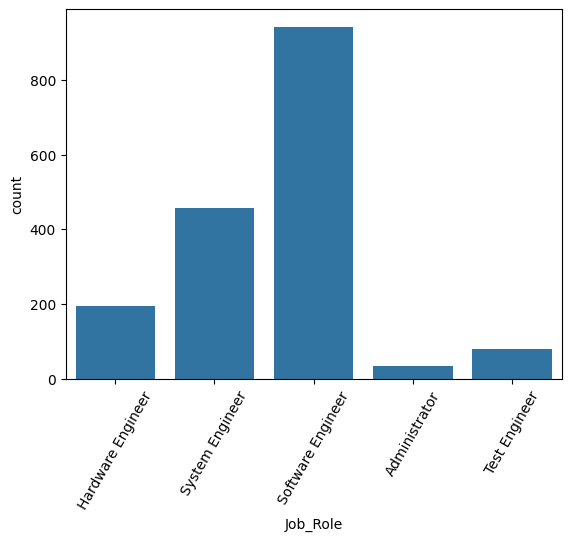

In [90]:
sns.countplot(data=df, x='Job_Role')
plt.xticks(rotation=60)
plt.show()

#### Specialization

In [91]:
cat_df["Specialization"].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [92]:
cat_df["Specialization"].nunique()

46

In [104]:
specializations = [
     ('electronics|electrical|communication|computer|mechanical|system|instrumentation', 'engineering|eng|technology|communication|instrumentation|automation'),
    ('computer|information', 'science|engineering|technology|application|networking'),
    ('civil|industrial|automobile|aeronautical|polymer|bio|chemical|metallurgical|ceramic', 'engineering|technology')
]
choices = ['computer engineering', 'computer science', 'industrial engineering']
conditions = []
for spec in specializations:
    condition = df['Specialization'].str.contains(spec[0]) & df['Specialization'].str.contains(spec[1])
    conditions.append(condition)

print(len(conditions), len(choices))
if len(conditions) == len(choices):
      df['Specialty'] = np.select(conditions, choices, default = 'other')
else:
   raise ValueError("Length of Conditions and choices do not match!")

3 3


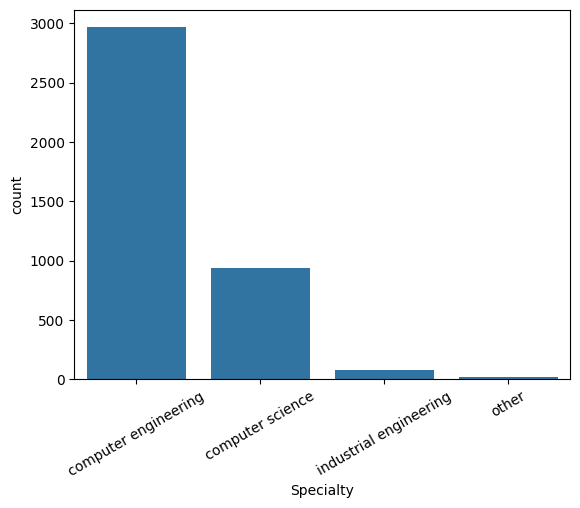

In [105]:
sns.countplot(data=df, x='Specialty')
plt.xticks(rotation=30)
plt.show()

above 90% of graduates majored in computer engineering or computer science.


### Degree

In [106]:
cat_df["Degree"].unique

<bound method Series.unique of 0       B.Tech/B.E.
1       B.Tech/B.E.
2       B.Tech/B.E.
3       B.Tech/B.E.
4       B.Tech/B.E.
           ...     
3993    B.Tech/B.E.
3994    B.Tech/B.E.
3995    B.Tech/B.E.
3996    B.Tech/B.E.
3997    B.Tech/B.E.
Name: Degree, Length: 3998, dtype: object>

In [107]:
cat_df["Degree"].value_counts()

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

In [108]:
df["Degree"] = df["Degree"].replace({'B.Tech/B.E.': 'Bachelor', 'MCA': 'Master', 'M.Tech./M.E.': 'Master', 'M.Sc. (Tech.)': 'Master'})


In [109]:
df["Degree"].value_counts()

Degree
Bachelor    3700
Master       298
Name: count, dtype: int64

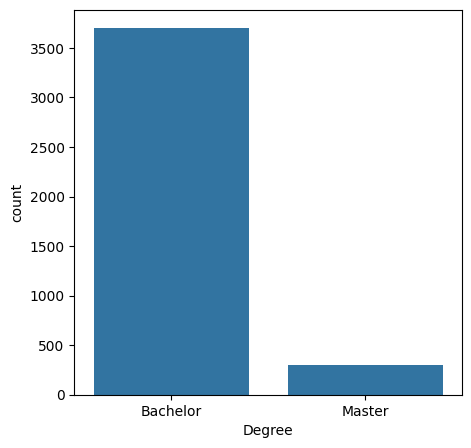

In [111]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="Degree")
plt.show()

Over 90% of graduates received a bachelor's degree 

### Job City

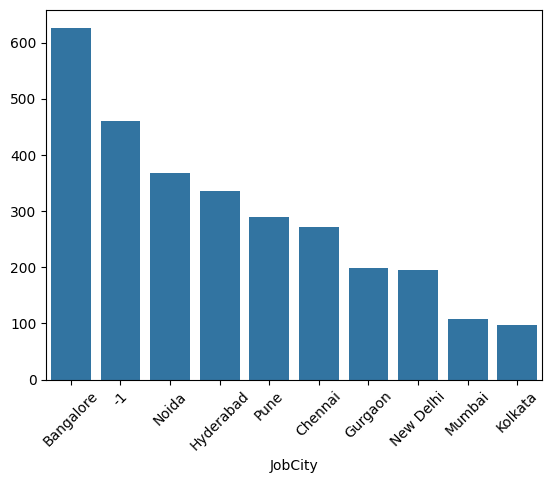

In [118]:
JobCity = df['JobCity'].value_counts().nlargest(10)
sns.barplot(x=JobCity.index, y= JobCity.values)
plt.xticks(rotation=45)
plt.show()

In the above graph we can say that most of the salarised people are staying in metropolitian cities, being banglore at top (620)

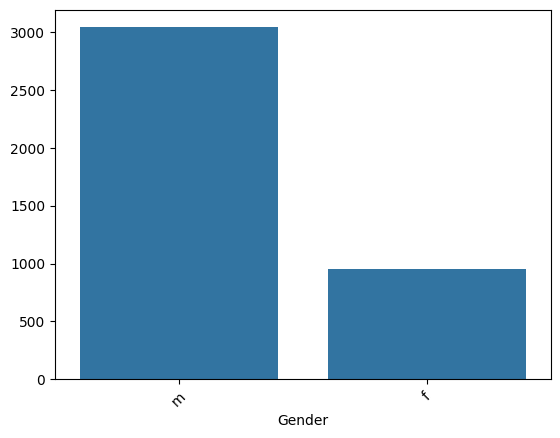

In [117]:
Gender = df['Gender'].value_counts()
sns.barplot(x=Gender.index, y= Gender.values)
plt.xticks(rotation=45)
plt.show()

For this dataset there are 3000 working men cpmpared to 1000 working women which is 1/3.

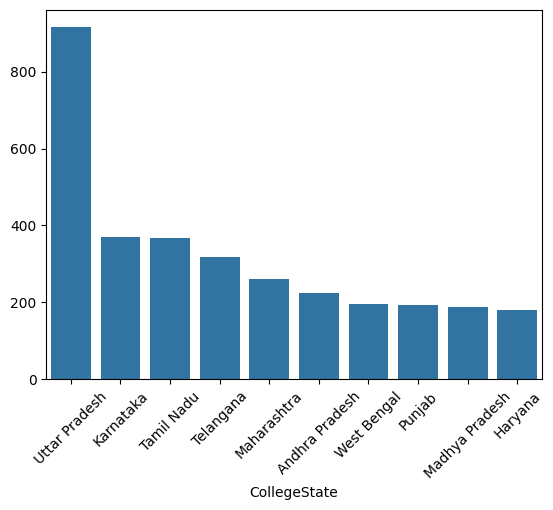

In [120]:
CollegeState = df['CollegeState'].value_counts().nlargest(10)
sns.barplot(x=CollegeState.index, y= CollegeState.values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
Highest no.of college are present in U.P 

## Bivariate Analysis

In [121]:
df.columns

Index(['ID', 'Salary', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'JobAge', 'JobDuration', 'Job_Role', 'Specialty'],
      dtype='object')

## Gender v/s Age

In [123]:
df.groupby('Gender')['Age'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,24.420,1.647,20.0,23.0,24.0,25.0,32.0
m,3041.0,24.621,1.801,18.0,23.0,24.0,26.0,38.0


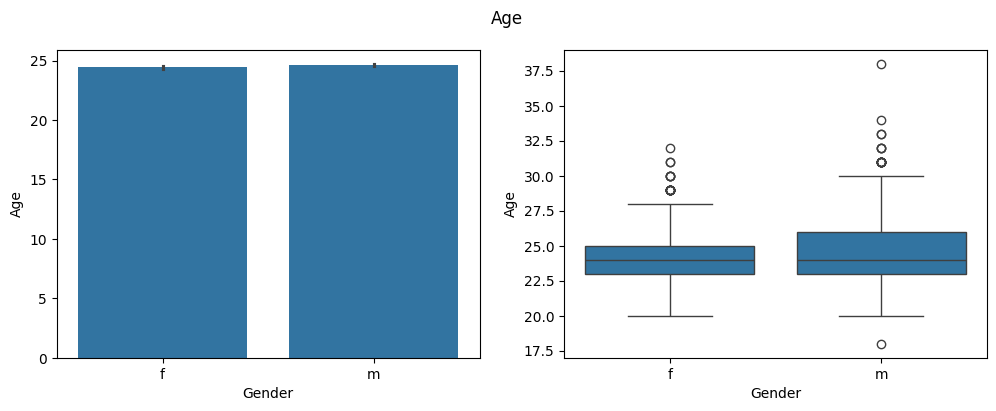

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Age', data=df, ax=ax1)
sns.boxplot(x='Gender', y='Age', data=df, ax=ax2)
plt.suptitle('Age')
plt.show()

The Age of both male and female are equally same their mean ages are also same

## Gender v/s Specialization

In [125]:
crosstab= pd.crosstab(index=df['Gender'], columns=df['Specialty'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Specialty'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Specialty Counts')
crosstab

Female and male Specialty Counts


Specialty,computer engineering,computer science,industrial engineering,other
Gender,,,,
f,693,241,22,1
m,2271,694,58,18


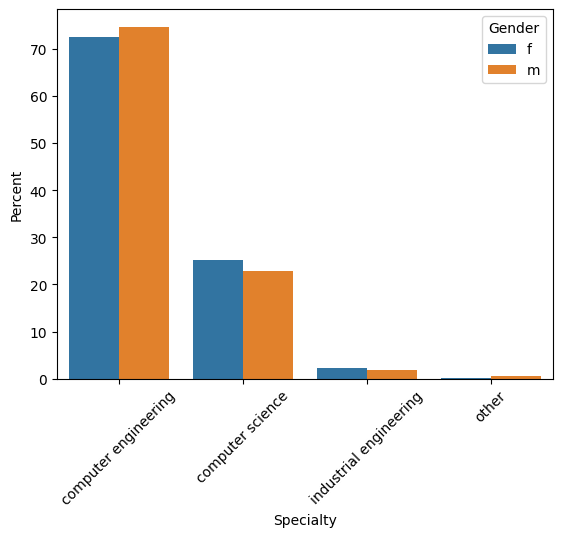

In [126]:
props = df.groupby('Gender', as_index=False)['Specialty'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Specialty'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.xticks(rotation=45)
plt.show()

From the above graph the obervation is :
The male graduates prefer computer engineering more as their specialization than female
The female graduates prefer computer science more as their specialization than male

## Gender v/s 10thGrade and 12thGrade

Overall marks obtained in 10th grade examinations


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,80.9,8.8,48.8,75.0,82.4,87.6,97.1
m,3041.0,77.0,10.0,43.0,70.7,78.0,85.0,97.8


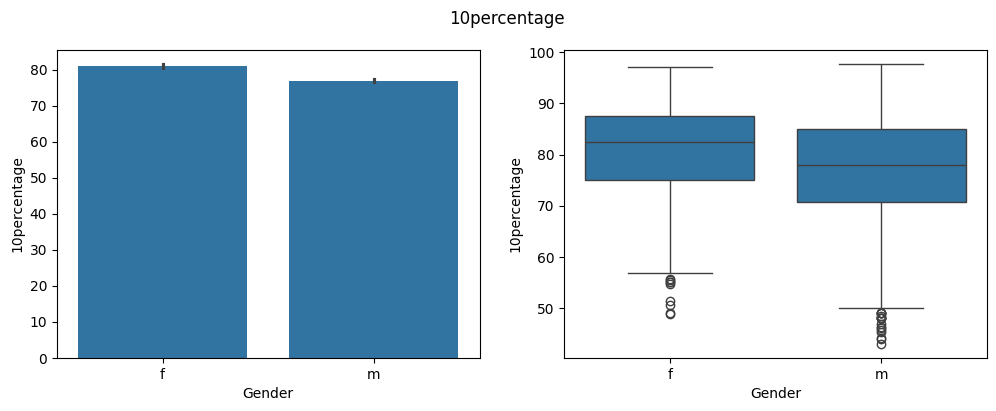


************************************************************

Overall marks obtained in 12th grade examinations


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,77.0,10.9,43.1,69.2,77.0,85.6,98.2
m,3041.0,73.7,10.9,40.0,65.2,73.4,81.8,98.7


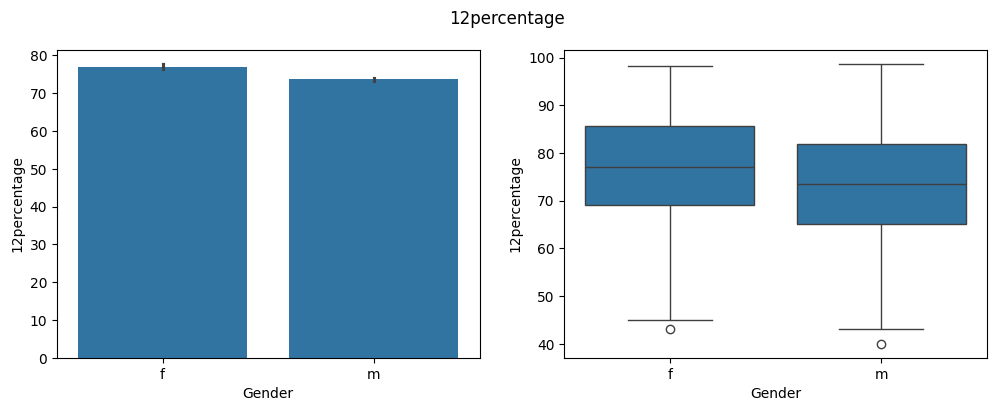

In [127]:
print('Overall marks obtained in 10th grade examinations')
display(df.groupby('Gender')['10percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='10percentage', data=df, ax=ax1)
sns.boxplot(x='Gender', y='10percentage', data=df, ax=ax2)
plt.suptitle('10percentage')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Overall marks obtained in 12th grade examinations')
display(df.groupby('Gender')['12percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='12percentage', data=df, ax=ax1)
sns.boxplot(x='Gender', y='12percentage', data=df, ax=ax2)
plt.suptitle('12percentage')
plt.show()

Females have obtained more grades or secured good grades as compared to mens

## Gender v/s collegeGPA

In [128]:
df.groupby('Gender')['collegeGPA'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,74.048056,7.266736,9.30,70.00,74.00,78.15,99.93
m,3041.0,70.679947,8.269352,6.45,65.63,70.66,75.70,98.40


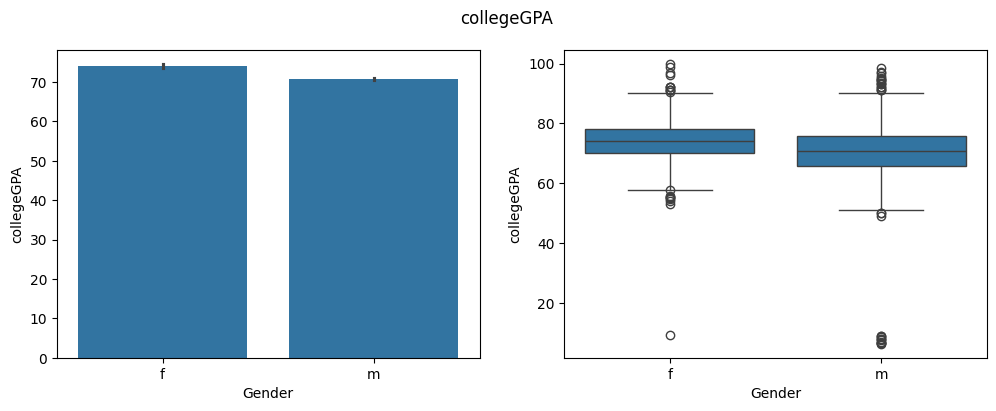

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='Gender', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('collegeGPA')
plt.show()

The women have higher college GPAs than men.

## Gender vs Degree

In [130]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Degree'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Degree'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Degree counts')
crosstab

Female and male Degree counts


Degree,Bachelor,Master
Gender,,
f,889,68
m,2811,230


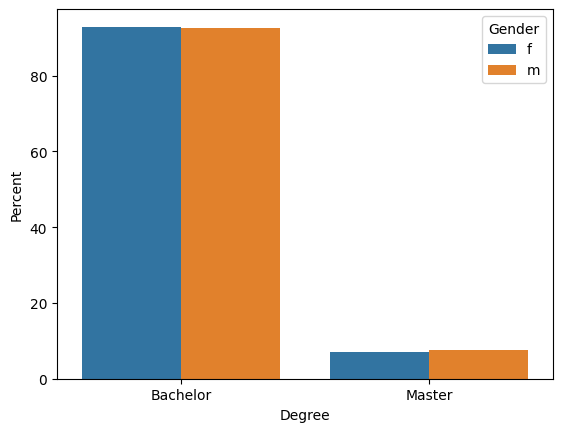

In [131]:
props = df.groupby('Gender', as_index=False)['Degree'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Degree'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.show()

There is no difference between men and women in degrees obtained.

## Gender v/s Job

In [132]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Job_Role'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Job_Role'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Job counts')
crosstab

Female and male Job counts


Job_Role,Administrator,Hardware Engineer,Software Engineer,System Engineer,Test Engineer
Gender,,,,,
f,10,46,219,112,18
m,24,149,722,344,61


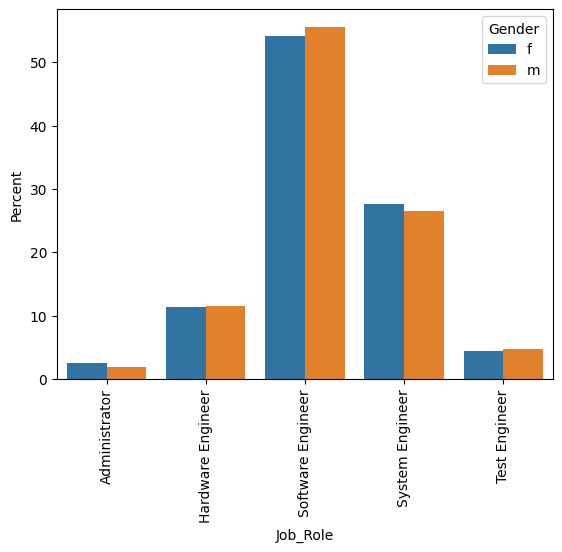

In [133]:
props = df.groupby('Gender', as_index=False)['Job_Role'].value_counts(normalize=True, sort=False)
props['proportion'] = props['proportion'] * 100
sns.barplot(x='Job_Role', y='proportion', data=props, hue='Gender')
plt.ylabel('Percent')
plt.xticks(rotation=90)
plt.show()

Female graduates are more likely than male graduates to work as analysts, while men are more likely to work as hardware engineers. In other positions, there is almost no gender difference.

## Gender v/s Salary

In [134]:
df.groupby('Gender')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,294937.304075,191031.789503,35000.0,200000.0,300000.0,355000.0,3500000.0
m,3041.0,311716.211772,218999.537438,35000.0,180000.0,300000.0,380000.0,4000000.0


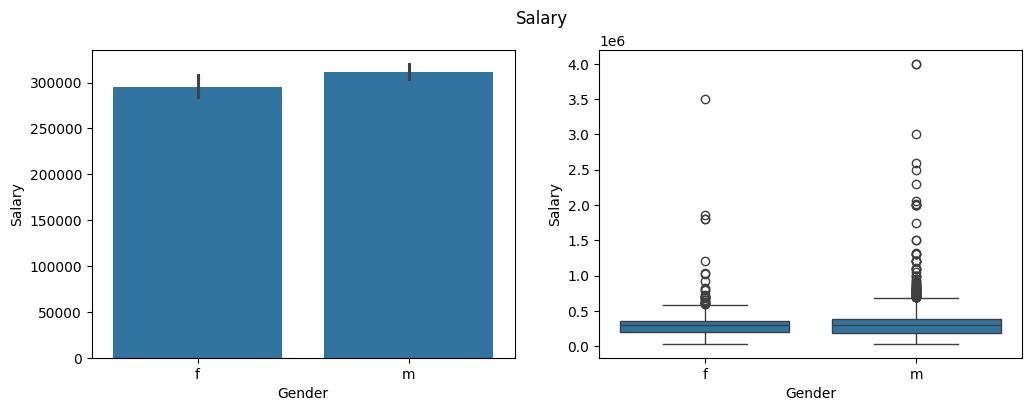

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Gender', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

There is a small difference in the mean salary between women and men, but it is hard to say whether this differnce is sgnificant.

## Gender v/s AMCAT scores

English scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,501.91,100.66,250.0,430.0,500.0,570.0,870.0
m,3041.0,501.57,106.27,180.0,425.0,500.0,570.0,875.0


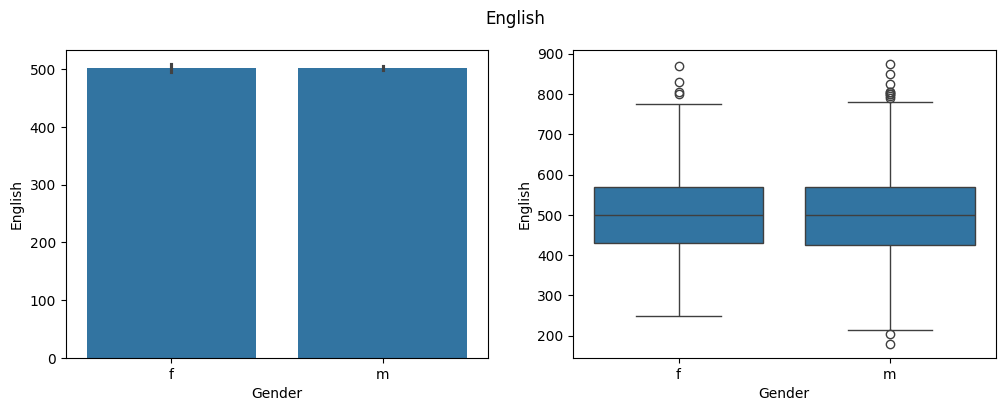

Logical scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,499.89,82.34,255.0,445.0,500.0,555.0,705.0
m,3041.0,502.14,88.14,195.0,445.0,505.0,565.0,795.0


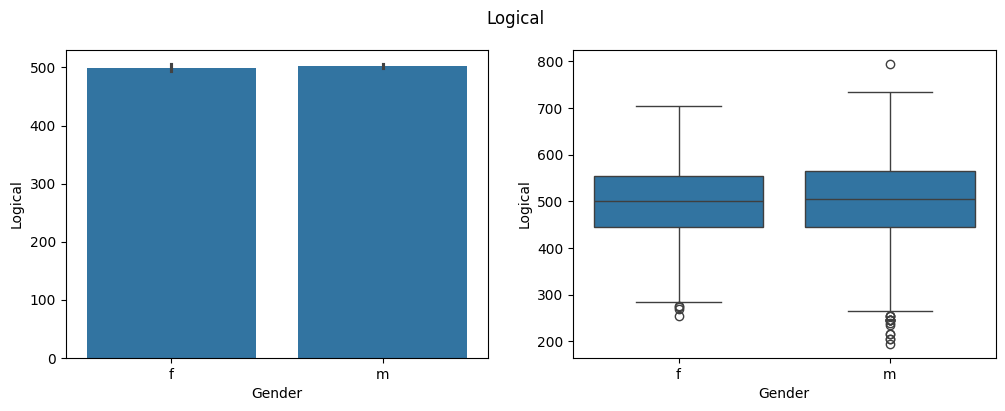

Quant scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,492.36,116.25,135.0,415.0,494.0,575.0,825.0
m,3041.0,519.99,123.43,120.0,435.0,525.0,605.0,900.0


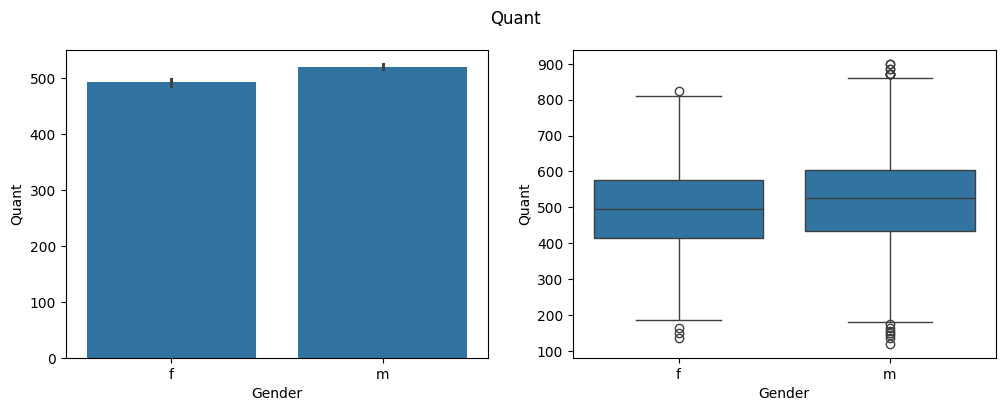

Domain scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,910.0,0.60,0.26,0.01,0.38,0.64,0.82,1.0
m,2842.0,0.61,0.28,0.00,0.38,0.65,0.84,1.0


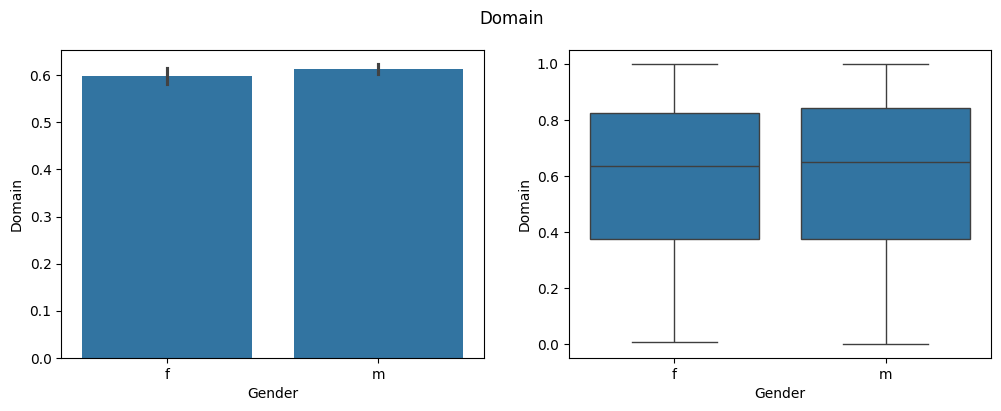

ComputerProgramming scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,786.0,441.63,83.26,105.0,385.0,445.0,495.0,745.0
m,2344.0,454.54,101.20,115.0,385.0,455.0,525.0,840.0


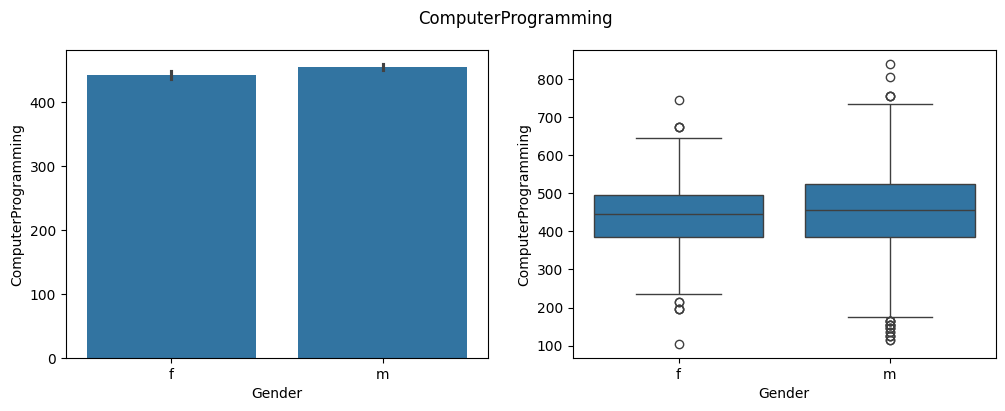

ElectronicsAndSemicon scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,268.0,330.36,77.57,133.0,292.0,333.0,371.5,612.0
m,876.0,337.26,82.25,133.0,292.0,333.0,388.0,612.0


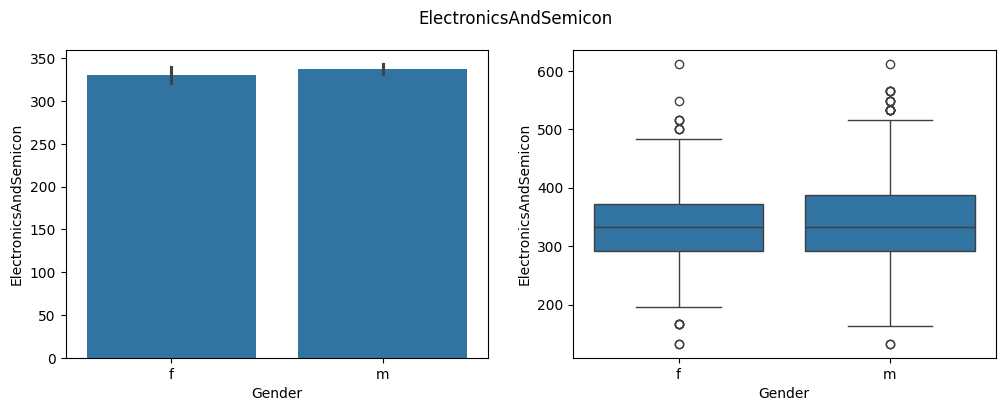

ComputerScience scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,221.0,399.55,90.58,192.0,346.0,407.0,469.0,715.0
m,681.0,407.61,89.74,130.0,346.0,407.0,469.0,715.0


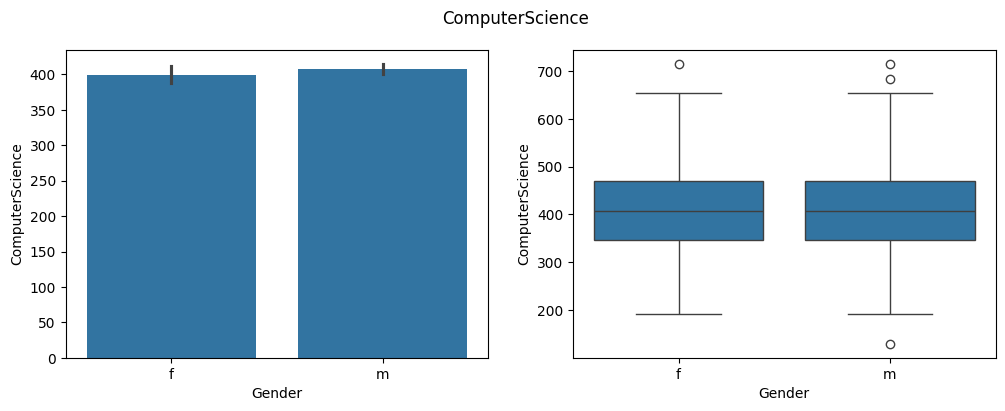

MechanicalEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,17.0,418.94,73.21,313.0,376.0,409.0,446.0,606.0
m,218.0,405.94,85.82,180.0,346.0,407.0,446.0,623.0


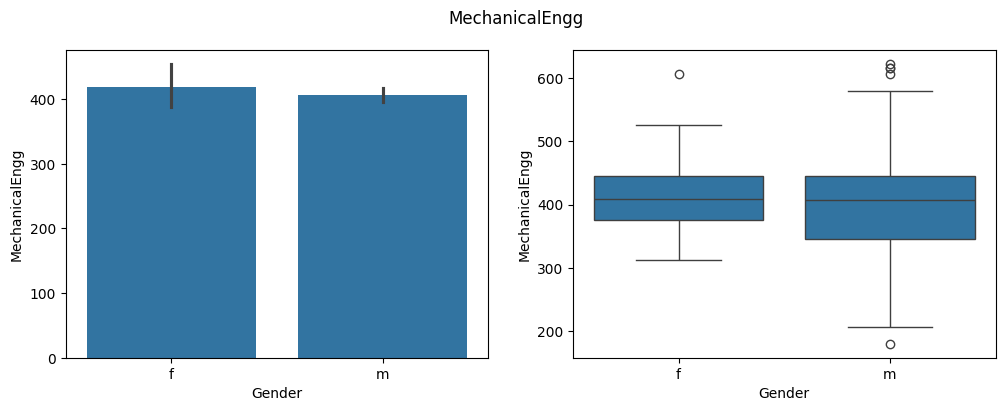

ElectricalEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,30.0,415.93,112.06,206.0,328.0,393.0,473.0,633.0
m,131.0,436.95,95.19,228.0,366.0,446.0,500.0,676.0


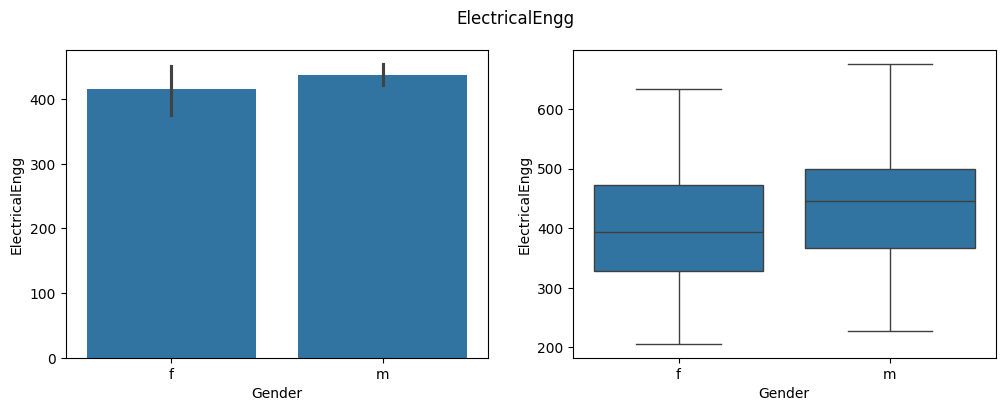

TelecomEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,94.0,357.80,70.96,228.0,297.25,366.0,393.0,526.0
m,280.0,347.61,77.13,153.0,286.00,340.0,393.0,548.0


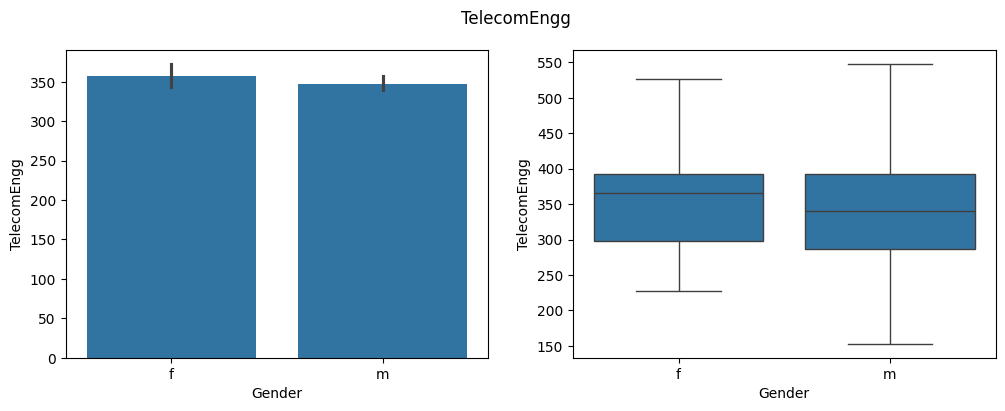

CivilEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,7.0,386.86,69.46,280.0,356.0,388.0,414.0,500.0
m,35.0,342.23,80.52,166.0,292.0,322.0,388.0,516.0


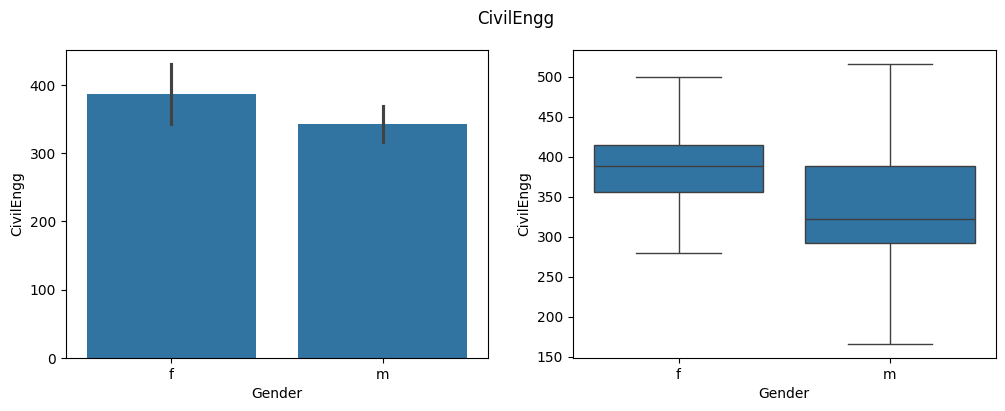

In [136]:
for col in scores:
  print(f'{col} scores')
  display(df.groupby('Gender')[col].describe().round(2))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=df, ax=ax1)
  sns.boxplot(x='Gender', y=col, data=df, ax=ax2)
  plt.suptitle(col)
  plt.show()

In most fields, score differences between genders are minor. However, women outperform men in civil Engineering, while men excel in Elctrical Engineering.

conscientiousness standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,953.0,0.1,0.9,-2.9,-0.4,0.3,0.8,2.0
m,3015.0,-0.1,1.0,-2.9,-0.7,-0.0,0.7,2.0


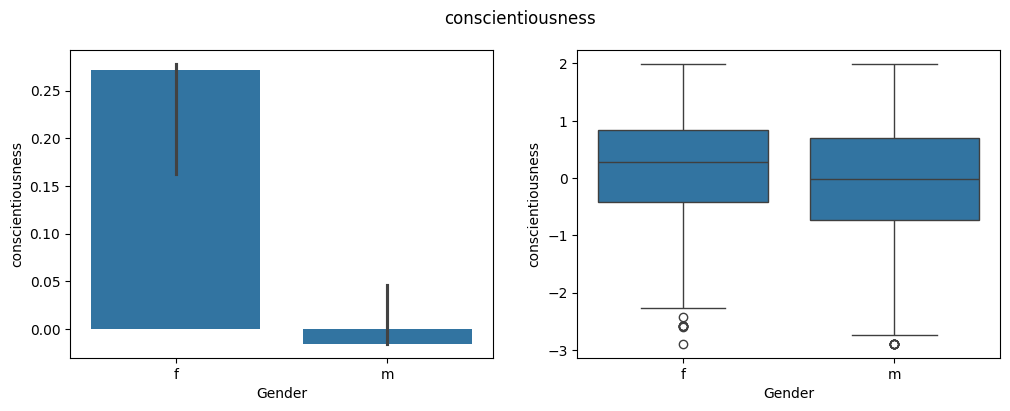

agreeableness standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,950.0,0.3,0.8,-3.0,-0.1,0.4,0.9,1.9
m,3015.0,0.1,0.9,-3.0,-0.4,0.2,0.7,1.9


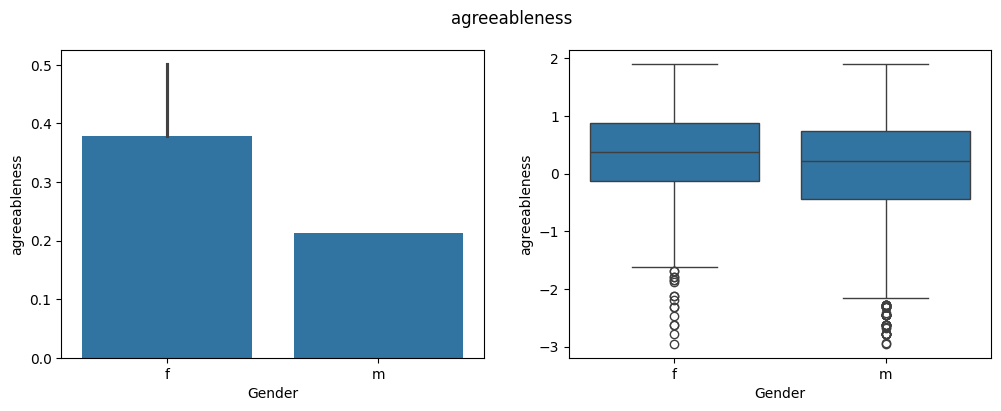

extraversion standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,952.0,0.0,0.9,-3.0,-0.6,0.1,0.7,2.2
m,3027.0,0.0,0.9,-2.9,-0.6,0.1,0.7,2.5


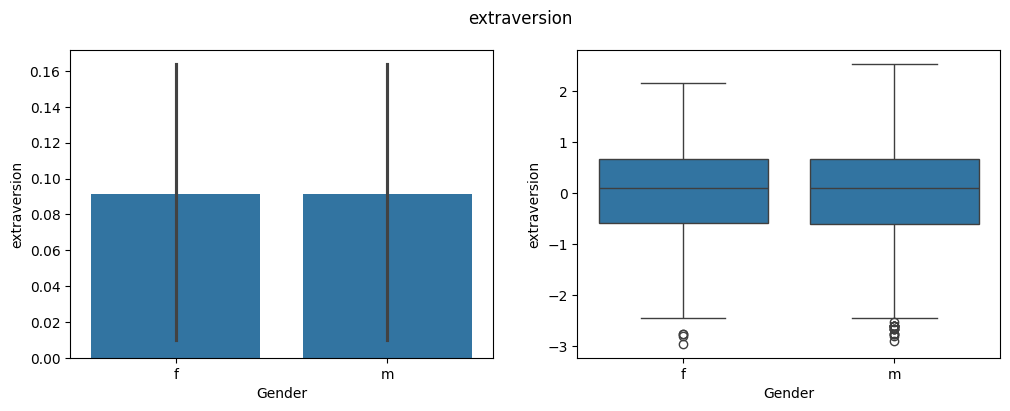

nueroticism standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,-0.2,1.0,-2.6,-0.9,-0.2,0.5,2.8
m,3041.0,-0.2,1.0,-2.6,-0.9,-0.2,0.5,3.4


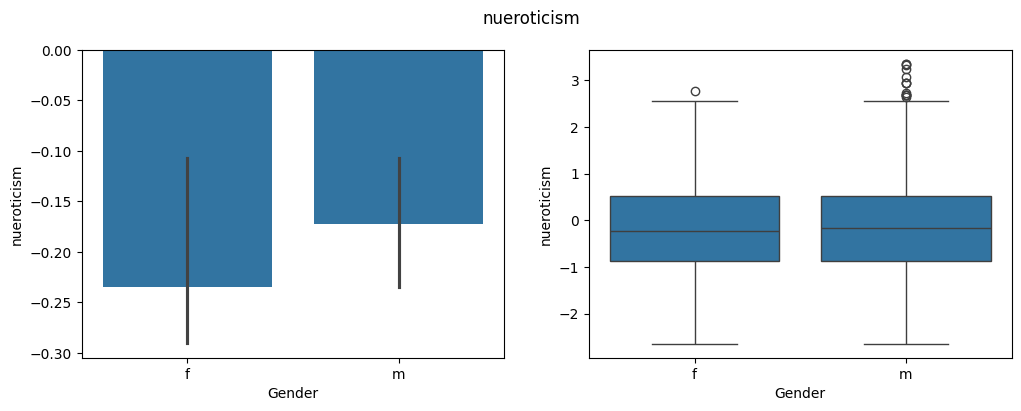

openess_to_experience standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,946.0,0.1,0.8,-3.0,-0.4,0.2,0.7,1.8
m,3006.0,-0.1,0.9,-3.0,-0.7,-0.1,0.5,1.6


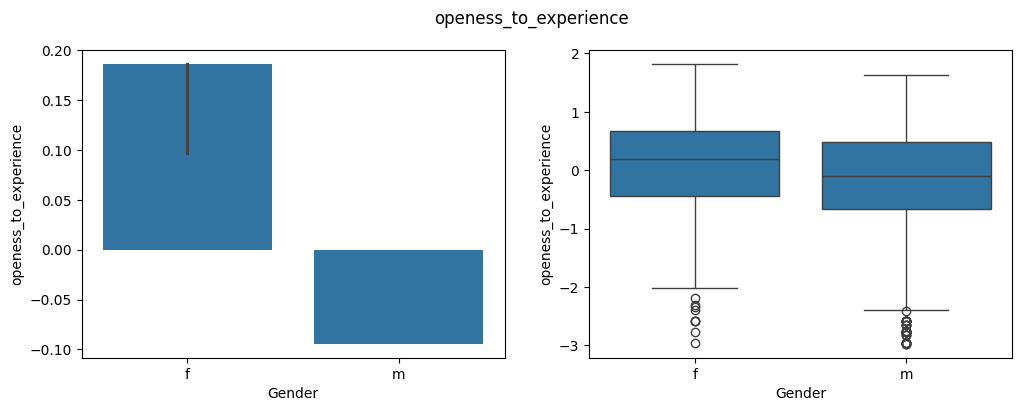

In [137]:
for col in standard_scores:
  df_cleaned = df[df[col] >= -3]
  print(f'{col} standardized scores')
  display(df_cleaned.groupby('Gender')[col].describe().round(1))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=df_cleaned, estimator='median', ax=ax1)
  sns.boxplot(x='Gender', y=col, data=df_cleaned, ax=ax2)
  plt.suptitle(col)
  plt.show()

Women tend to score higher on personality tests such as conscientiousness, agreeableness, and openness to experience.

## CollegeTier v/s CollegeGPA

In [138]:
df.groupby('CollegeTier')['collegeGPA'].describe()

,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,73.987845,9.503475,8.58,69.40,74.30,79.29,99.93
2,3701.0,71.285415,8.018223,6.45,66.02,71.36,76.08,99.00


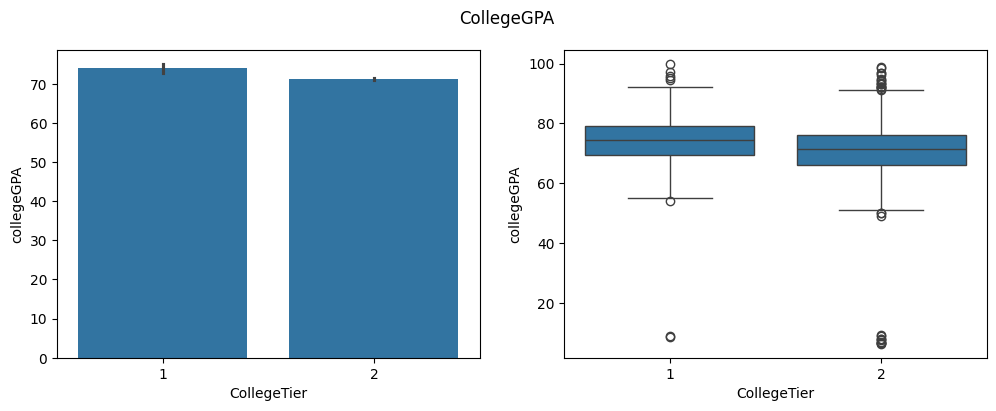

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('CollegeGPA')
plt.show()

Graduates from Tier 1 colleges have higher average grades.

## Salary v/s JOB

In [140]:
order = df.groupby('Job_Role')['Salary'].mean().sort_values().index

df.groupby('Job_Role')['Salary'].describe().round(1).sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Job_Role,,,,,,,,
Administrator,34.0,170882.4,49504.7,80000.0,125000.0,167500.0,215000.0,285000.0
Hardware Engineer,195.0,282430.8,180148.0,40000.0,172500.0,220000.0,342500.0,1200000.0
Software Engineer,941.0,348512.2,223980.5,50000.0,240000.0,315000.0,400000.0,4000000.0
Test Engineer,79.0,351265.8,438869.8,60000.0,182500.0,325000.0,395000.0,4000000.0
System Engineer,456.0,357412.3,178579.8,35000.0,320000.0,330000.0,415000.0,3500000.0


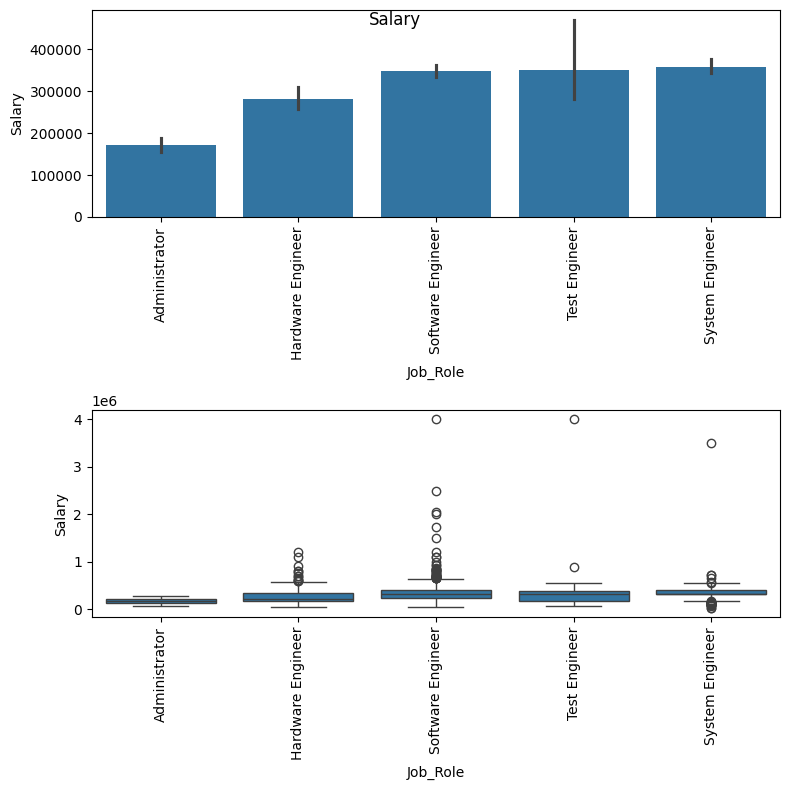

In [141]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()

Managers and system, software, and test engineers earn the highest salaries.

## Salary v/v Job Duration

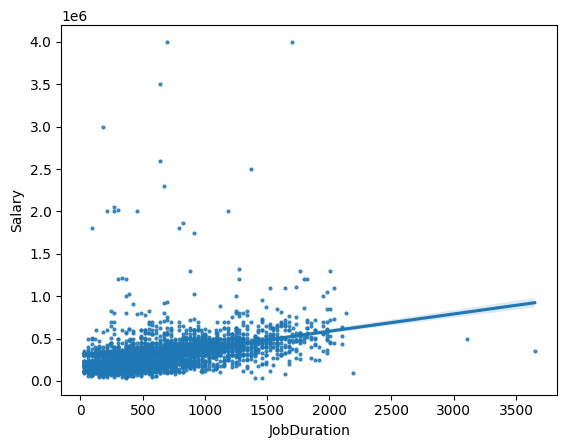

In [142]:
sns.regplot(x='JobDuration', y='Salary', data=df, scatter_kws={'s':4})
plt.show()

## Salary v/s CollegeTier

In [143]:
df.groupby('CollegeTier')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,442356.902357,312169.285374,100000.0,315000.0,360000.0,500000.0,4000000.0
2,3701.0,296893.812483,198800.849194,35000.0,180000.0,300000.0,360000.0,4000000.0


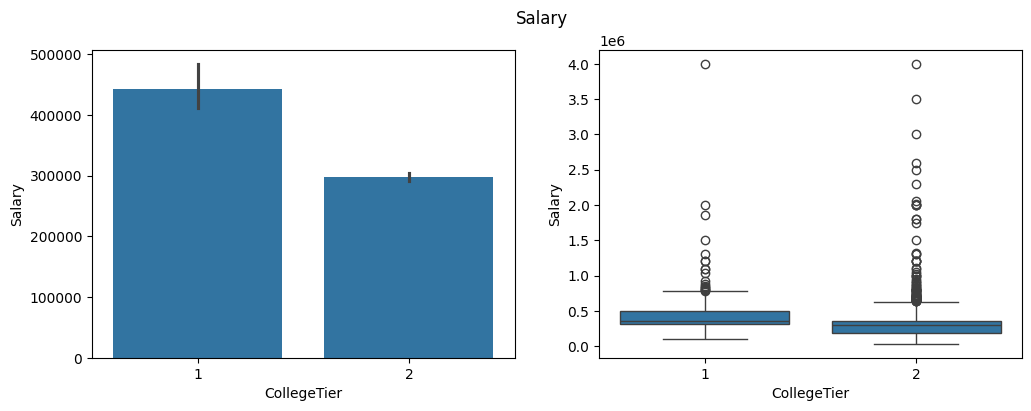

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='Salary', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

The student who have complerted their studies from Tier1 college is more likely to get good salary as coompared to the tIER2 student .

## Salary v/s Age

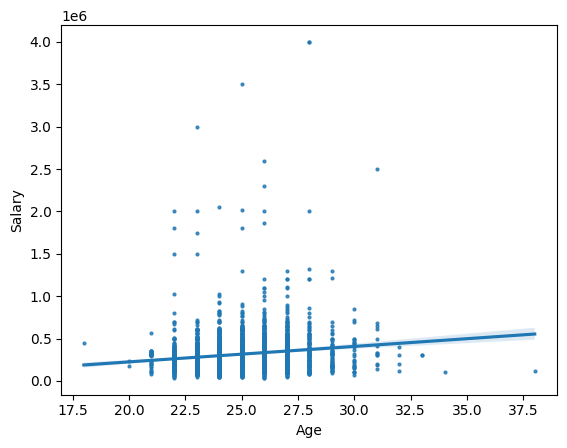

In [145]:
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'s':4})
plt.show()

## Salary v/s Specialty

In [146]:
order = df.groupby('Specialty')['Salary'].mean().sort_values().index

df.groupby('Specialty')['Salary'].describe().round(1).sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Specialty,,,,,,,,
other,19.0,256842.1,142294.8,40000.0,137500.0,240000.0,355000.0,600000.0
computer science,935.0,300625.7,217044.6,35000.0,180000.0,300000.0,380000.0,4000000.0
computer engineering,2964.0,309470.0,212548.7,35000.0,195000.0,300000.0,365000.0,4000000.0
industrial engineering,80.0,336875.0,177780.6,100000.0,195000.0,320000.0,400000.0,800000.0


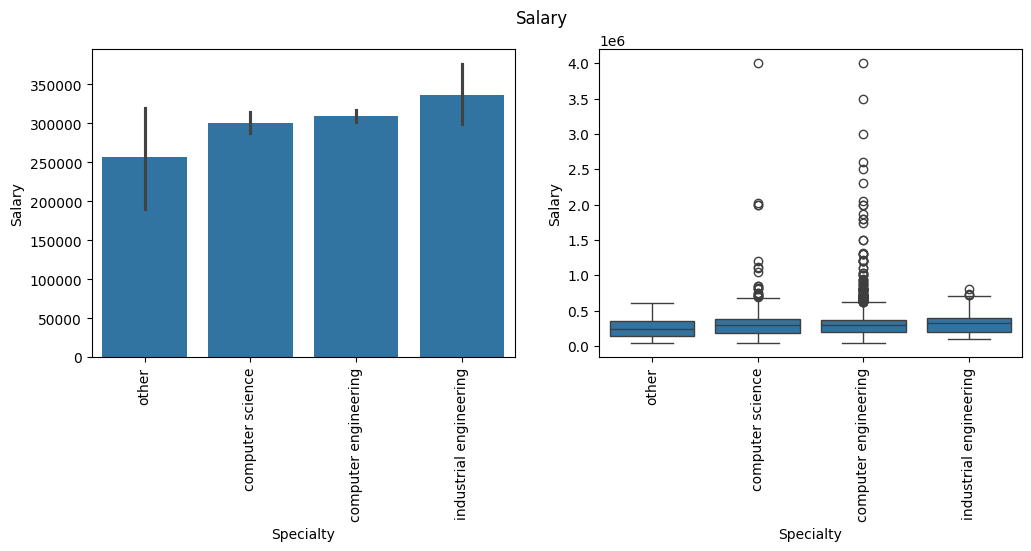

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Specialty', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Specialty', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.suptitle('Salary')
plt.show()

The Student who have graduated having specialization in Industrial Engineering earn more as compared to Computer Science Engineer.

## Salary v/s Degree

In [148]:
df.groupby('Degree')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Degree,,,,,,,,
Bachelor,3700.0,308622.702703,203358.186090,35000.0,190000.0,300000.0,370000.0,4000000.0
Master,298.0,296241.610738,306387.887142,40000.0,150000.0,230000.0,360000.0,4000000.0


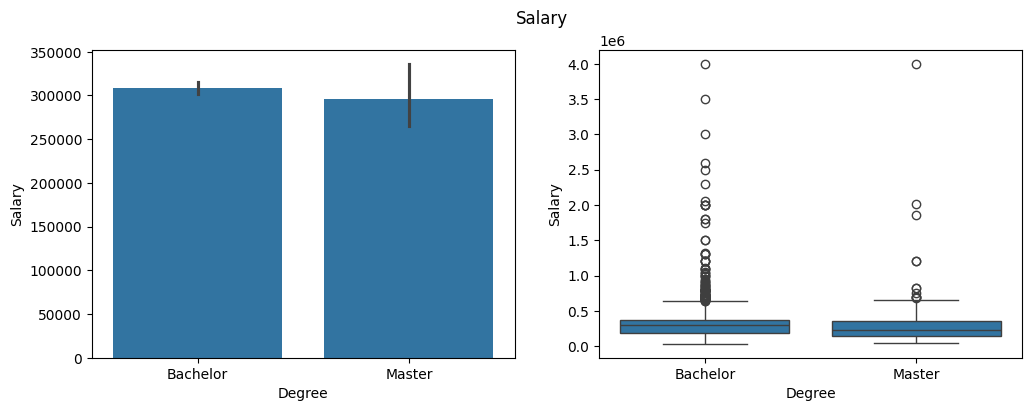

In [149]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Degree', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

The ones who have pursued for Bachelor's having more chance to earn better than Master's.

In [150]:
df.columns

Index(['ID', 'Salary', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'JobAge', 'JobDuration', 'Job_Role', 'Specialty'],
      dtype='object')

In [151]:
df.drop(["10board","12board","Specialization","CollegeCityID","CollegeCityTier","CollegeID"],axis=1,inplace=True)

In [152]:
df.shape

(3998, 35)

## Research Questions
### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

## Relation between Salary and Job_Role

In [153]:
df["Job_Role"].unique()

array(['Hardware Engineer', nan, 'System Engineer', 'Software Engineer',
       None, 'Administrator', 'Test Engineer'], dtype=object)

In [154]:
df["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [155]:
filtered_df = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
filtered_df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,12graduation,12percentage,CollegeTier,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,JobAge,JobDuration,Job_Role,Specialty
19,466888,325000,software engineer,Pune,f,1990-11-30,79.00,2008,62.20,2,...,0.8192,0.2668,-0.2714,-0.40780,-0.1295,25,24.0,486.0,Software Engineer,computer engineering
20,140069,320000,software engineer,Bangalore,f,1988-07-25,91.20,2006,84.63,2,...,-0.1082,0.9688,0.5269,-0.29020,0.3444,27,22.0,670.0,Software Engineer,computer engineering
21,339689,200000,software engineer,-1,f,1991-08-20,75.67,2007,74.40,2,...,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,24,21.0,487.0,Software Engineer,computer science
24,963123,335000,programmer analyst,Hyderabad,m,1993-06-28,88.00,2010,90.00,2,...,0.4155,0.8027,0.1357,-0.99500,-0.6692,22,21.0,365.0,NaN,computer engineering
31,1094324,340000,software engineer,Bangalore,m,1992-10-23,77.20,2010,86.10,2,...,-0.0154,1.2114,1.0859,-1.50210,0.2889,23,22.0,243.0,Software Engineer,computer engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,212055,550000,software engineer,Bangalore,m,1989-07-22,69.16,2006,65.66,1,...,-0.5719,0.5008,-0.4891,0.41480,-1.2354,26,24.0,274.0,Software Engineer,computer engineering
3981,1077872,220000,software engineer,Gurgaon,m,1991-12-17,53.40,2009,65.40,2,...,0.1282,-0.2871,-0.1437,-1.12180,1.4386,24,23.0,486.0,Software Engineer,computer engineering
3984,305041,480000,software engineer,Gurgaon,f,1990-01-18,89.80,2007,83.80,2,...,-0.2628,0.1888,0.3817,-0.29020,1.6082,25,21.0,1491.0,Software Engineer,computer engineering
3989,1204604,300000,software engineer,Bangalore,m,1991-11-23,74.88,2010,82.55,2,...,0.1282,0.0459,1.2396,1.03330,0.6721,24,23.0,486.0,Software Engineer,computer engineering


In [156]:
average_salary = filtered_df['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

The average salary for these roles is: 339790.4624277457


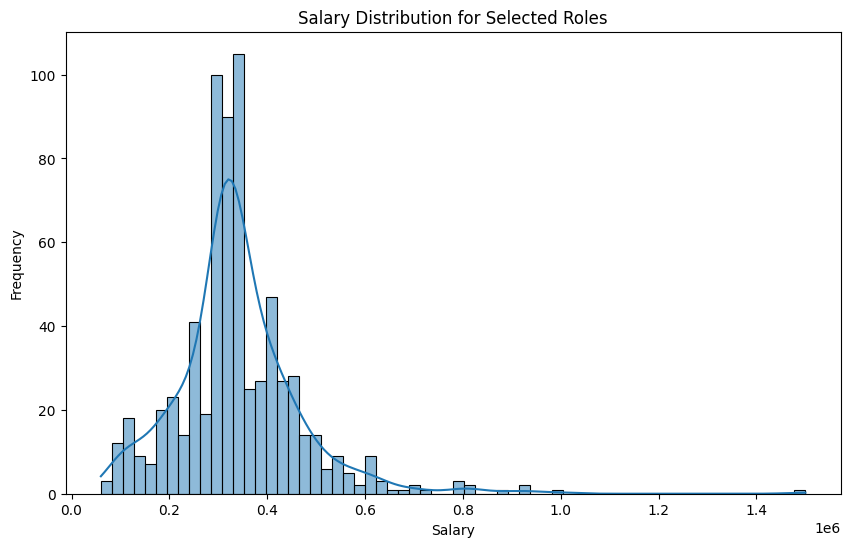

In [157]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [158]:
max_salary = filtered_df['Salary'].max()

In [159]:
if max_salary >= 250000 and max_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.


In [160]:
avg_salary=filtered_df['Salary'].mean()
avg_salary

339790.4624277457

In [161]:
if avg_salary >= 250000 and avg_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.


### Again we can prove it with the help of Inferential stats that The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.

In [162]:
from scipy.stats import zscore

filtered_df = filtered_df[zscore(filtered_df['Salary']) < 3]

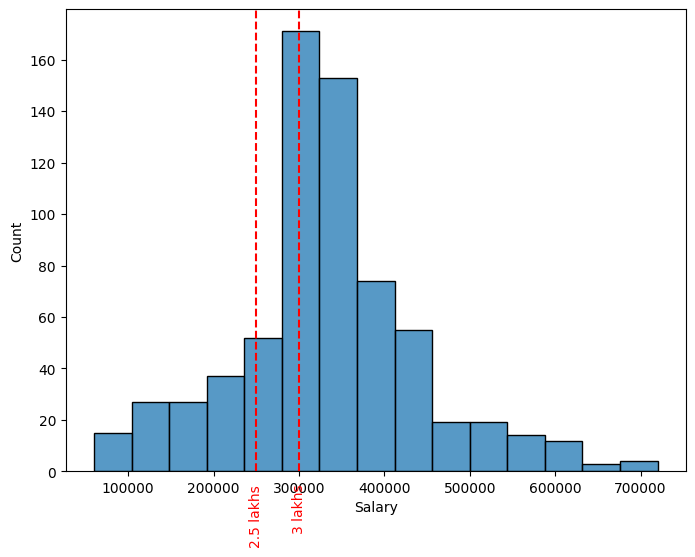

In [163]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(filtered_df['Salary'], bins=15)
ax.axvline(250000, ls='--', color='r')
ax.axvline(300000, ls='--', color='r')
ax.text(250000, -5, "2.5 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
ax.text(300000, -5, "3 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
plt.show()

### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

## Gender v/s Specialization

In [165]:
pd.crosstab(index=df['Gender'], columns=df['Specialty'])

Specialty,computer engineering,computer science,industrial engineering,other
Gender,,,,
f,693,241,22,1
m,2271,694,58,18


To check for difference in specialization preference between men and women, we will use the chi-square test, excluding the "Other" specialty to ensure all observed frequencies are at least 5 at a significance level of 0.05.

In [166]:
from scipy.stats import chi2_contingency

gen_spec_df = df[df['Specialty'] != 'Other']
cont_tab = pd.crosstab(index=gen_spec_df['Gender'], columns=gen_spec_df['Specialty'])
chi2 = chi2_contingency(cont_tab, correction=False)
print("statistic:", chi2.statistic)
print("p-value:", chi2.pvalue)

statistic: 6.436402823756059
p-value: 0.09220464582557503


The p-value exceeds the significance level, suggesting that gender and specialization are independent with no association.

#### Is there a relationship between gender and salary?

In [167]:
df.groupby('Gender')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,294937.304075,191031.789503,35000.0,200000.0,300000.0,355000.0,3500000.0
m,3041.0,311716.211772,218999.537438,35000.0,180000.0,300000.0,380000.0,4000000.0


In [168]:
from scipy.stats import mannwhitneyu

fem_sal = df[df['Gender'] == 'f']['Salary']
mal_sal = df[df['Gender'] == 'm']['Salary']

u_stat, p_value = mannwhitneyu(fem_sal, mal_sal, alternative='less')
print("U-statistic:", u_stat)
print("p-value:", p_value)


U-statistic: 1400518.5
p-value: 0.03969567110195918


 There is a significant gap, with women earning less than men